<a href="https://colab.research.google.com/github/jorgecif/practicaUAZ/blob/main/ConexionDiagnosticoPractica_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



### Conexión con base de datos del formulario


In [ ]:
# Librerías
!sudo apt-get install python3-dev default-libmysqlclient-dev
!pip install pymysql
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

import time
from IPython.display import clear_output

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-dev is already the newest version (3.6.7-1~18.04).
The following NEW packages will be installed:
  default-libmysqlclient-dev libmysqlclient-dev
0 upgraded, 2 newly installed, 0 to remove and 14 not upgraded.
Need to get 992 kB of archives.
After this operation, 6,023 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmysqlclient-dev amd64 5.7.32-0ubuntu0.18.04.1 [988 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 default-libmysqlclient-dev amd64 1.0.4 [3,736 B]
Fetched 992 kB in 1s (858 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This fr

#### Conexión

In [ ]:
# Conexión con la base de datos
import pymysql
## importing 'mysql.connector' as mysql for convenient
#import mysql.connector as mysql

## connecting to the database using 'connect()' method
## it takes 3 required parameters 'host', 'user', 'passwd'
db = pymysql.connect(
    host = "h9kz43355373088.db.43355373.aa5.hostedresource.net",
    user = "h9kz43355373088",
    port = 3311,
    db="h9kz43355373088",
    passwd = "qO@(gX0WQA"
)

print(db) # it will print a connection object if everything is fine

#### Descarga de registros

In [ ]:
# Descarga de registros almacenados en el formulario

import pandas as pd 
con = db

try:

    with con.cursor() as cur:
        cur.execute('SELECT * FROM wp_yx076xcyvv_wpforms_entry_fields')
        rows = cur.fetchall()
        registros=[]
        for row in rows:
            registros.append(row)

finally:

    con.close()

registros

[(682, 29, 1216, 0, 'Eric Jones', datetime.datetime(2020, 10, 31, 13, 18, 13)),
 (683,
  29,
  1216,
  1,
  'eric@talkwithwebvisitor.com',
  datetime.datetime(2020, 10, 31, 13, 18, 13)),
 (684,
  29,
  1216,
  2,
  "My name’s Eric and I just came across your website - aiforbetterworld.com - in the search results.\r\n\r\nHere’s what that means to me…\r\n\r\nYour SEO’s working.\r\n\r\nYou’re getting eyeballs – mine at least.\r\n\r\nYour content’s pretty good, wouldn’t change a thing.\r\n\r\nBUT…\r\n\r\nEyeballs don’t pay the bills.\r\n\r\nCUSTOMERS do.\r\n\r\nAnd studies show that 7 out of 10 visitors to a site like aiforbetterworld.com will drop by, take a gander, and then head for the hills without doing anything else.\r\n\r\nIt’s like they never were even there.\r\n\r\nYou can fix this.\r\n\r\nYou can make it super-simple for them to raise their hand, say, “okay, let’s talk” without requiring them to even pull their cell phone from their pocket… thanks to Talk With Web Visitor.\r\n\r\

### Organización del dataframe

In [ ]:
# Creación del dataframe

df = pd.DataFrame(registros, columns=["Num", "UserID", "Form", "QuestID", "Rta", "Timestamp"]) 
df

,Num,UserID,Form,QuestID,Rta,Timestamp
0,682,29,1216,0,Eric Jones,2020-10-31 13:18:13
1,683,29,1216,1,eric@talkwithwebvisitor.com,2020-10-31 13:18:13
2,684,29,1216,2,My name’s Eric and I just came across your web...,2020-10-31 13:18:13
3,842,35,1216,0,DavidClearYG,2020-11-07 21:03:06
4,843,35,1216,1,yourmail@gmail.com,2020-11-07 21:03:06
...,...,...,...,...,...,...
5492,6944,218,1549,104,Nunca,2020-12-16 21:23:05
5493,6945,218,1549,106,Nunca,2020-12-16 21:23:05
5494,6946,218,1549,184,Nunca,2020-12-16 21:23:05
5495,6947,218,1549,183,Nunca,2020-12-16 21:23:05


In [ ]:
# Filtro el dataframe con datos que me interesan

df_filtrado=df.loc[df['Form'] == 1210] # Filtro por formularo 1210 de WPforms en Wordpress

df_columnas=df_filtrado[["UserID","Form", "QuestID","Rta"]] # Filtro dataframe con columnas requeridas para trabajar

In [ ]:
# Pivote de la tabla para agrupar por UserID
datos=df_columnas.pivot(index='UserID', columns='QuestID', values='Rta')
datos

QuestID,1,20,21,24,38,39,40,42,46,48,50,53,55,56,68,69,70,71,72,76,77,78,80,81,83,84,85,86,87,89,92,93,94,95,96,97,98,104,105,106,...,141,142,143,144,145,147,148,149,150,151,159,160,161,167,168,169,171,172,173,174,175,183,184,185,188,190,192,210,212,217,220,222,223,224,225,231,232,233,237,238
UserID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
55,Sólo con texto,NaN,NaN,NaN,24,Femenino,cmonicalinet@gmail.com,+524941166324,Soltero,Unidad Académica de Psicología,Regular,177.242.158.158,No,9,Nunca,Nunca,Nunca,Pocas veces,Nunca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Nunca,Nunca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Al parecer todos están poniendo atención a la ...,{entry_geolocation},Ansiedad,Bajo,NaN,Buena,Licenciatura en Psicología (Presencial) - &#36...,NaN,3,Si,Padres,Licenciatura,C,NaN,No,Desde tu casa,Teléfono móvil
56,Con emoticones,Algunas veces,NaN,NaN,22,Masculino,joselito22joselito22@gmail.com,+524925594715,Soltero,Unidad Académica de Psicología,Regular,181.236.184.82,No,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Casi siempre,NaN,Algunas veces,NaN,NaN,NaN,Algunas veces,Algunas veces,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"La imagen que es proyectada, muestra a un chic...",{entry_geolocation},Ansiedad,Medio,NaN,Buena,Licenciatura en Psicología (Presencial) - &#36...,NaN,3,Si,Padres,Licenciatura,C,NaN,No,Desde tu casa,Laptop
57,Con memes,NaN,Nunca,NaN,25,Femenino,vivicortez2007@gmail.com,+524921710146,Soltero,Unidad Académica de Psicología,Regular,190.250.179.98,No,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Pocas veces,NaN,Nunca,NaN,Pocas veces,NaN,NaN,NaN,NaN,Nunca,Nunca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Veo a una persona distraída, que no ha dormido...",{entry_geolocation},Ansiedad,Bajo,NaN,Regular,Licenciatura en Psicología (Presencial) - &#36...,NaN,2,Si,Padres,Licenciatura,C,NaN,No,Desde tu casa,Teléfono móvil
58,Con memes,NaN,Algunas veces,NaN,23,Femenino,lm6137493@gmail.com,+524922885262,Soltero,Unidad Académica de Psicología,Regular,181.236.184.82,No,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Algunas veces,NaN,Algunas veces,NaN,Algunas veces,NaN,NaN,NaN,NaN,Casi siempre,Casi siempre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Están en clase y les están explicando como van...,{entry_geolocation},Ansiedad,Medio,NaN,Regular,Licenciatura en Psicología (Presencial) - &#36...,NaN,Más de 3,Si,Padres,Licenciatura,C,NaN,No,Desde tu casa,Laptop
59,Sólo con texto,NaN,NaN,NaN,24,Femenino,martinezagueda246@gmail.com,+524921956498,Soltero,Unidad Académica de Psicología,Regular,177.242.158.158,No,9,Casi siempre,Siempre,Casi siempre,Casi siempre,Casi siempre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Siempre,Casi siempre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"El chavo se muestra preocupao,incluso no está ...",{entry_geolocation},Ansiedad,Alto,NaN,Regular,NaN,NaN,1,Si,Padres,Seleccione,C,NaN,No,Desde tu casa,Teléfono móvil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,Con emoticones,NaN,NaN,NaN,48,Femenino,normaarandaa8@gmail.com,4921967374,Soltero,Unidad Académica de Psicología,Regular,187.133.19.27,Si,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pocas veces,NaN,NaN,NaN,Pocas veces,Pocas veces,Pocas veces,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
#datos_sort = datos.sort_values(by='Rta', ascending=False)
#datos_sort.head()
#df.columns = df.columns.str.strip()
#datos_sort = datos.sort_values(by='Num', ascending=False)
#df_prueba = df
#df_prueba['Respuestas'] = (df_prueba.Rta != df.Rta.shift()).cumsum()
#aux = (df_prueba.Rta != df_prueba.Rta.shift()).cumsum()
#del(aux)
#df_sort = df.sort_values(by='QuestID')
#df_sort
#df
df_p = df.sort_values(by='QuestID')
df_p



,Num,UserID,Form,QuestID,Rta,Timestamp
0,682,29,1216,0,Eric Jones,2020-10-31 13:18:13
5031,6483,207,1216,0,Elenerig,2020-12-04 07:09:29
5034,6486,208,1216,0,Elida Whitefoord,2020-12-13 03:49:32
9,848,37,1216,0,Merissa Sierra,2020-11-14 13:48:00
6,845,36,1216,0,Eric Jones,2020-11-11 07:30:58
...,...,...,...,...,...,...
2647,4099,134,1210,238,Laptop,2020-11-21 02:33:59
3574,5026,162,1210,238,Teléfono móvil,2020-11-22 00:09:52
963,2415,83,1210,238,Laptop,2020-11-20 18:43:00
5239,6691,213,1549,238,Laptop,2020-12-16 00:00:55


In [ ]:
datos.shape

(151, 91)

### Análisis exploratorio de los datos

In [ ]:
# Revuelvo los registros
datos = datos.sample(frac = 1, random_state= 88) 
datos=datos.reset_index()
# Muestra de los datos
print("Se han cargado ", len(datos), " registros")
print("con ", len(datos.columns), " columnas")


Se han cargado  151  registros
con  92  columnas


In [ ]:
# Renombrado de columnas

lista_cols=[
            "userID",
            "ComoResponder_1",
            "Ansiedad_E_P1_20",
            "Ansiedad_M_P1_21",
            "Estres_M_P5_24",
            "edad_38",
            "genero_39",
            "email_40",
            "cel_42",
            "edo_civil_46",
            "unidadAcademica_48",
            "tipoAlumno_50",
            "IP_53",
            "hijos_55",
            "semestre_56",
            "Ansiedad_T_P1_68", 
            "Ansiedad_T_P2_69",
            "Ansiedad_T_P3_70",
            "Ansiedad_T_P4_71",
            "Ansiedad_T_P5_72",
            "Depresion_T_P1_76",
            "Depresion_T_P4_77",
            "Depresion_T_P3_78",
            "Depresion_T_P5_80",
            "Depresion_T_P7_81",
            "Estres_T_P3_83",
            "Estres_T_P1_84",
            "Estres_T_P7_85",
            "Estres_T_P4_86",
            "Estres_T_P5_87",
            "Estres_T_P6_89",
            "Depresion_E_P5_92",
            "Depresion_E_P6_93",
            "Depresion_E_P3_94",
            "Estres_E_P1_95",
            "Depresion_E_P2_96",
            "Depresion_E_P4_97",
            "Depresion_E_P1_98",
            "Estres_E_P4_104",
            "Estres_E_P3_105",
            "Estres_E_P5_106",
            "Estres_E_P2_107",
            "Estres_M_P7_114",
            "Estres_M_P4_116",
            "Estres_M_P2_117",
            "Estres_M_P3_118",
            "Depresion_M_P1_119",
            "Estres_M_P6_124",
            "AvisoPrivacidad_128",
            "Ansiedad_E_P2_136",
            "Ansiedad_M_P2_137",
            "Ansiedad_E_P3_140",
            "Ansiedad_M_P3_141",
            "Ansiedad_E_P4_142",
            "Ansiedad_M_P5_143",
            "Ansiedad_E_P5_144",
            "Ansiedad_M_P6_145",
            "Ansiedad_T_P7_147",
            "Ansiedad_T_P6_148",
            "Ansiedad_E_P6_149",
            "Ansiedad_E_P7_150",
            "Ansiedad_M_P7_151",
            "Ansiedad_M_P4_159",
            "Estres_M_P1_160",
            "Depresion_M_P2_161",
            "Depresion_T_P2_167",
            "Depresion_T_P6_168",
            "Depresion_E_P7_169",
            "Depresion_M_P6_171",
            "Depresion_M_P5_172",
            "Depresion_M_P7_173",
            "Depresion_M_P4_174",
            "Depresion_M_P3_175",
            "Estres_E_P7_183",
            "Estres_E_P6_184",
            "CampoAbiertoTexto_185", 
            "Ubicacion_188",
            "transtorno_190",
            "nivelTranstorno_192",
            "Estres_T_P2_210", 
            "CalidadInternet_212",
            "progEducativoLic_217",
            "hijosNumero220",
            "Hermanos_cuantos_222",
            "Hermanos_223",
            "ViveCon_224",
            "nivelEducativo_225", 
            "grupo_231",
            "CursosAdicionales_Cuales_232",
            "CursosAdicionalesSiNo_233",
            "SeConectaDesde_237",
            "Dispositivo_238"
]
print(len(lista_cols))
print(len(datos.columns))
datos.columns=lista_cols

92
92


In [ ]:
# Verificación de datos nulos

datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 92 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   userID                        151 non-null    int64 
 1   ComoResponder_1               151 non-null    object
 2   Ansiedad_E_P1_20              10 non-null     object
 3   Ansiedad_M_P1_21              20 non-null     object
 4   Estres_M_P5_24                32 non-null     object
 5   edad_38                       151 non-null    object
 6   genero_39                     151 non-null    object
 7   email_40                      151 non-null    object
 8   cel_42                        151 non-null    object
 9   edo_civil_46                  151 non-null    object
 10  unidadAcademica_48            151 non-null    object
 11  tipoAlumno_50                 151 non-null    object
 12  IP_53                         151 non-null    object
 13  hijos_55            

In [ ]:
# Tipos de datos
datos.dtypes.value_counts() 

object    91
int64      1
dtype: int64

In [ ]:
# Variables categóricas
catFeature = datos.columns[datos.dtypes == object]
catFeature

Index(['ComoResponder_1', 'Ansiedad_E_P1_20', 'Ansiedad_M_P1_21',
       'Estres_M_P5_24', 'edad_38', 'genero_39', 'email_40', 'cel_42',
       'edo_civil_46', 'unidadAcademica_48', 'tipoAlumno_50', 'IP_53',
       'hijos_55', 'semestre_56', 'Ansiedad_T_P1_68', 'Ansiedad_T_P2_69',
       'Ansiedad_T_P3_70', 'Ansiedad_T_P4_71', 'Ansiedad_T_P5_72',
       'Depresion_T_P1_76', 'Depresion_T_P4_77', 'Depresion_T_P3_78',
       'Depresion_T_P5_80', 'Depresion_T_P7_81', 'Estres_T_P3_83',
       'Estres_T_P1_84', 'Estres_T_P7_85', 'Estres_T_P4_86', 'Estres_T_P5_87',
       'Estres_T_P6_89', 'Depresion_E_P5_92', 'Depresion_E_P6_93',
       'Depresion_E_P3_94', 'Estres_E_P1_95', 'Depresion_E_P2_96',
       'Depresion_E_P4_97', 'Depresion_E_P1_98', 'Estres_E_P4_104',
       'Estres_E_P3_105', 'Estres_E_P5_106', 'Estres_E_P2_107',
       'Estres_M_P7_114', 'Estres_M_P4_116', 'Estres_M_P2_117',
       'Estres_M_P3_118', 'Depresion_M_P1_119', 'Estres_M_P6_124',
       'AvisoPrivacidad_128', 'Ansieda

In [ ]:
# Variables numéricas
conFeature = datos.columns[datos.dtypes != object]
conFeature

Index(['userID'], dtype='object')

In [ ]:
# Descripción de los datos

datos.describe(include="all")

,userID,ComoResponder_1,Ansiedad_E_P1_20,Ansiedad_M_P1_21,Estres_M_P5_24,edad_38,genero_39,email_40,cel_42,edo_civil_46,unidadAcademica_48,tipoAlumno_50,IP_53,hijos_55,semestre_56,Ansiedad_T_P1_68,Ansiedad_T_P2_69,Ansiedad_T_P3_70,Ansiedad_T_P4_71,Ansiedad_T_P5_72,Depresion_T_P1_76,Depresion_T_P4_77,Depresion_T_P3_78,Depresion_T_P5_80,Depresion_T_P7_81,Estres_T_P3_83,Estres_T_P1_84,Estres_T_P7_85,Estres_T_P4_86,Estres_T_P5_87,Estres_T_P6_89,Depresion_E_P5_92,Depresion_E_P6_93,Depresion_E_P3_94,Estres_E_P1_95,Depresion_E_P2_96,Depresion_E_P4_97,Depresion_E_P1_98,Estres_E_P4_104,Estres_E_P3_105,...,Ansiedad_M_P3_141,Ansiedad_E_P4_142,Ansiedad_M_P5_143,Ansiedad_E_P5_144,Ansiedad_M_P6_145,Ansiedad_T_P7_147,Ansiedad_T_P6_148,Ansiedad_E_P6_149,Ansiedad_E_P7_150,Ansiedad_M_P7_151,Ansiedad_M_P4_159,Estres_M_P1_160,Depresion_M_P2_161,Depresion_T_P2_167,Depresion_T_P6_168,Depresion_E_P7_169,Depresion_M_P6_171,Depresion_M_P5_172,Depresion_M_P7_173,Depresion_M_P4_174,Depresion_M_P3_175,Estres_E_P7_183,Estres_E_P6_184,CampoAbiertoTexto_185,Ubicacion_188,transtorno_190,nivelTranstorno_192,Estres_T_P2_210,CalidadInternet_212,progEducativoLic_217,hijosNumero220,Hermanos_cuantos_222,Hermanos_223,ViveCon_224,nivelEducativo_225,grupo_231,CursosAdicionales_Cuales_232,CursosAdicionalesSiNo_233,SeConectaDesde_237,Dispositivo_238
count,151.000000,151,10,20,32,151,151,151,151,151,151,151,151,151,151,18,18,18,18,18,6,6,6,6,6,3,3,3,3,3,3,18,18,18,3,18,18,18,3,3,...,20,10,20,10,20,18,18,10,10,20,20,32,41,6,6,18,41,41,41,41,41,3,3,151,151,151,151,3,151,146,36,141,151,151,148,151,15,151,151,151
unique,NaN,3,4,5,4,32,2,146,145,4,2,2,13,2,7,5,5,5,5,5,3,4,3,2,4,2,2,3,2,2,1,4,5,4,3,4,5,5,2,3,...,5,4,5,4,5,5,5,4,4,4,5,4,5,4,3,5,5,5,5,5,5,2,3,149,1,3,3,2,5,3,4,4,2,5,2,4,12,2,3,3
top,NaN,Con memes,Pocas veces,Algunas veces,Algunas veces,20,Femenino,ricardomota0318@gmail.com,+524921234567,Soltero,Unidad Académica de Psicología,Regular,177.242.158.158,No,5,Nunca,Nunca,Siempre,Pocas veces,Nunca,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Casi siempre,Pocas veces,Algunas veces,Casi siempre,Casi siempre,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Casi siempre,Algunas veces,...,Algunas veces,Pocas veces,Nunca,Pocas veces,Pocas veces,Nunca,Casi siempre,Pocas veces,Algunas veces,Nunca,Algunas veces,Algunas veces,Nunca,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Casi siempre,Algunas veces,Una persona preocupada que esta pensando en al...,{entry_geolocation},Depresión,Medio,Algunas veces,Regular,Licenciatura en Psicología (Presencial) - &#36...,1,2,Si,Padres,Licenciatura,C,Inglés,No,Desde tu casa,Teléfono móvil
freq,NaN,93,4,9,11,37,110,2,3,123,148,150,62,115,52,6,5,6,5,6,3,2,3,4,2,2,2,1,2,2,3,8,9,7,1,8,8,8,2,1,...,5,4,7,5,6,5,7,4,3,6,6,11,13,2,3,8,11,12,12,13,12,2,1,2,151,65,52,2,88,97,16,48,141,108,146,109,3,136,146,96
mean,130.026490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,43.779135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,92.

In [ ]:
datos.head()

,userID,ComoResponder_1,Ansiedad_E_P1_20,Ansiedad_M_P1_21,Estres_M_P5_24,edad_38,genero_39,email_40,cel_42,edo_civil_46,unidadAcademica_48,tipoAlumno_50,IP_53,hijos_55,semestre_56,Ansiedad_T_P1_68,Ansiedad_T_P2_69,Ansiedad_T_P3_70,Ansiedad_T_P4_71,Ansiedad_T_P5_72,Depresion_T_P1_76,Depresion_T_P4_77,Depresion_T_P3_78,Depresion_T_P5_80,Depresion_T_P7_81,Estres_T_P3_83,Estres_T_P1_84,Estres_T_P7_85,Estres_T_P4_86,Estres_T_P5_87,Estres_T_P6_89,Depresion_E_P5_92,Depresion_E_P6_93,Depresion_E_P3_94,Estres_E_P1_95,Depresion_E_P2_96,Depresion_E_P4_97,Depresion_E_P1_98,Estres_E_P4_104,Estres_E_P3_105,...,Ansiedad_M_P3_141,Ansiedad_E_P4_142,Ansiedad_M_P5_143,Ansiedad_E_P5_144,Ansiedad_M_P6_145,Ansiedad_T_P7_147,Ansiedad_T_P6_148,Ansiedad_E_P6_149,Ansiedad_E_P7_150,Ansiedad_M_P7_151,Ansiedad_M_P4_159,Estres_M_P1_160,Depresion_M_P2_161,Depresion_T_P2_167,Depresion_T_P6_168,Depresion_E_P7_169,Depresion_M_P6_171,Depresion_M_P5_172,Depresion_M_P7_173,Depresion_M_P4_174,Depresion_M_P3_175,Estres_E_P7_183,Estres_E_P6_184,CampoAbiertoTexto_185,Ubicacion_188,transtorno_190,nivelTranstorno_192,Estres_T_P2_210,CalidadInternet_212,progEducativoLic_217,hijosNumero220,Hermanos_cuantos_222,Hermanos_223,ViveCon_224,nivelEducativo_225,grupo_231,CursosAdicionales_Cuales_232,CursosAdicionalesSiNo_233,SeConectaDesde_237,Dispositivo_238
0,139,Con memes,NaN,NaN,NaN,20,Femenino,apvillagrana10@gmail.com,4921600629,Soltero,Unidad Académica de Psicología,Regular,177.227.65.162,No,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Algunas veces,NaN,NaN,NaN,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Algunas veces,NaN,NaN,Se pueden percibir 4 sujetos con angustia y al...,{entry_geolocation},Depresión,Medio,NaN,Regular,Licenciatura en Psicología (Presencial) - &#36...,NaN,3,Si,Padres,Licenciatura,C,NaN,No,Desde tu casa,Laptop
1,175,Con memes,NaN,NaN,NaN,36,Femenino,joshua1virginia@gmail.com,4929097527,Soltero,Unidad Académica de Psicología,Regular,177.242.158.205,Si,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nunca,NaN,NaN,NaN,Nunca,Pocas veces,Nunca,Nunca,Pocas veces,NaN,NaN,La niña magaly encontrandoce en la escuela rec...,{entry_geolocation},Depresión,Bajo,NaN,Regular,Licenciatura en Psicología (Semi-Presencial) -...,1,Más de 3,Si,Padres,Licenciatura,A,NaN,No,Desde tu casa,Teléfono móvil
2,94,Con memes,NaN,NaN,Nunca,21,Femenino,guadianita67@gmail.com,+524921969306,Soltero,Unidad Académica de Psicología,Regular,181.236.184.82,No,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nunca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Se nota una persona que se encuetra tranquila,...",{entry_geolocation},Estrés,Bajo,NaN,Regular,Licenciatura en Psicología (Presencial) - &#36...,NaN,1,Si,Padres,Licenciatura,C,NaN,No,Desde tu casa,Escritorio
3,85,Con memes,NaN,NaN,Nunca,20,Femenino,pahnv17@outlook.com,+524922188423,Soltero,Unidad Académica de Psicología,Regular,181.236.184.82,No,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nunca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Creo que en la imagen se muestran varios alumn...,{entry_geolocation},Estrés,Bajo,NaN,Regular,Licenciatura en Psicología (Presencial) - &#36...,NaN,NaN,No,Padres,Licenciatura,C,Inglés,Sí,Desde casa de un familiar,Laptop
4,107,Con memes,NaN,NaN,Algunas veces,20,Femenino,airamjasso07@gmail.com,+524922678711,Soltero,Unidad Académica de Psicología,Regular,181.236.184.82,No,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Algunas veces,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"En un sa

In [ ]:
# Reviso las 10 primeras categorías de cada variable categórica

for col in datos.columns:
    print('-' * 40 + col + '-' * 40 , end=' - ')
    display(datos[col].value_counts().head(10))

----------------------------------------userID---------------------------------------- - 

206    1
110    1
108    1
107    1
106    1
105    1
104    1
103    1
102    1
101    1
Name: userID, dtype: int64

----------------------------------------ComoResponder_1---------------------------------------- - 

Con memes         93
Con emoticones    31
Sólo con texto    27
Name: ComoResponder_1, dtype: int64

----------------------------------------Ansiedad_E_P1_20---------------------------------------- - 

Pocas veces      4
Algunas veces    3
Nunca            2
Casi siempre     1
Name: Ansiedad_E_P1_20, dtype: int64

----------------------------------------Ansiedad_M_P1_21---------------------------------------- - 

Algunas veces    9
Nunca            5
Pocas veces      3
Casi siempre     2
Siempre          1
Name: Ansiedad_M_P1_21, dtype: int64

----------------------------------------Estres_M_P5_24---------------------------------------- - 

Algunas veces    11
Nunca             9
Siempre           9
Casi siempre      3
Name: Estres_M_P5_24, dtype: int64

----------------------------------------edad_38---------------------------------------- - 

20    37
22    22
21    17
23    10
24     6
18     6
19     6
25     5
33     5
32     3
Name: edad_38, dtype: int64

----------------------------------------genero_39---------------------------------------- - 

Femenino     110
Masculino     41
Name: genero_39, dtype: int64

----------------------------------------email_40---------------------------------------- - 

ricardomota0318@gmail.com        2
daniel.abisay@gmail.com          2
normaarandaa8@gmail.com          2
ja.tarango@uaz.edu.mx            2
itzelsanchezmau8@gmail.com       2
lperezdelgadillo482@gmail.com    1
alonzomtzn@gmail.com             1
jntonio21@hotmail.com            1
cynthia.ale.soria@gmail.com      1
grungebaltierra@outlook.com      1
Name: email_40, dtype: int64

----------------------------------------cel_42---------------------------------------- - 

+524921234567    3
4961417260       2
+524922911557    2
4929496692       2
4921967374       2
4921161556       1
4922047294       1
4921600629       1
4921146261       1
4922426565       1
Name: cel_42, dtype: int64

----------------------------------------edo_civil_46---------------------------------------- - 

Soltero        123
Casado          18
Divorciado       6
Unión libre      4
Name: edo_civil_46, dtype: int64

----------------------------------------unidadAcademica_48---------------------------------------- - 

Unidad Académica de Psicología    148
Seleccione                          3
Name: unidadAcademica_48, dtype: int64

----------------------------------------tipoAlumno_50---------------------------------------- - 

Regular       150
No regular      1
Name: tipoAlumno_50, dtype: int64

----------------------------------------IP_53---------------------------------------- - 

177.242.158.158    62
177.227.65.162     25
181.236.184.82     21
177.242.158.205    19
190.250.179.98      8
177.242.158.217     4
181.157.177.203     4
187.133.19.27       2
177.242.159.48      2
177.227.64.56       1
Name: IP_53, dtype: int64

----------------------------------------hijos_55---------------------------------------- - 

No    115
Si     36
Name: hijos_55, dtype: int64

----------------------------------------semestre_56---------------------------------------- - 

5    52
7    43
9    29
3    18
1     7
2     1
6     1
Name: semestre_56, dtype: int64

----------------------------------------Ansiedad_T_P1_68---------------------------------------- - 

Nunca            6
Casi siempre     5
Siempre          4
Algunas veces    2
Pocas veces      1
Name: Ansiedad_T_P1_68, dtype: int64

----------------------------------------Ansiedad_T_P2_69---------------------------------------- - 

Nunca            5
Casi siempre     5
Pocas veces      4
Siempre          3
Algunas veces    1
Name: Ansiedad_T_P2_69, dtype: int64

----------------------------------------Ansiedad_T_P3_70---------------------------------------- - 

Siempre          6
Nunca            4
Pocas veces      3
Casi siempre     3
Algunas veces    2
Name: Ansiedad_T_P3_70, dtype: int64

----------------------------------------Ansiedad_T_P4_71---------------------------------------- - 

Pocas veces      5
Siempre          5
Casi siempre     4
Algunas veces    2
Nunca            2
Name: Ansiedad_T_P4_71, dtype: int64

----------------------------------------Ansiedad_T_P5_72---------------------------------------- - 

Nunca            6
Casi siempre     5
Pocas veces      4
Siempre          2
Algunas veces    1
Name: Ansiedad_T_P5_72, dtype: int64

----------------------------------------Depresion_T_P1_76---------------------------------------- - 

Algunas veces    3
Siempre          2
Pocas veces      1
Name: Depresion_T_P1_76, dtype: int64

----------------------------------------Depresion_T_P4_77---------------------------------------- - 

Algunas veces    2
Siempre          2
Pocas veces      1
Casi siempre     1
Name: Depresion_T_P4_77, dtype: int64

----------------------------------------Depresion_T_P3_78---------------------------------------- - 

Algunas veces    3
Siempre          2
Pocas veces      1
Name: Depresion_T_P3_78, dtype: int64

----------------------------------------Depresion_T_P5_80---------------------------------------- - 

Algunas veces    4
Siempre          2
Name: Depresion_T_P5_80, dtype: int64

----------------------------------------Depresion_T_P7_81---------------------------------------- - 

Algunas veces    2
Pocas veces      2
Casi siempre     1
Siempre          1
Name: Depresion_T_P7_81, dtype: int64

----------------------------------------Estres_T_P3_83---------------------------------------- - 

Casi siempre    2
Nunca           1
Name: Estres_T_P3_83, dtype: int64

----------------------------------------Estres_T_P1_84---------------------------------------- - 

Pocas veces      2
Algunas veces    1
Name: Estres_T_P1_84, dtype: int64

----------------------------------------Estres_T_P7_85---------------------------------------- - 

Algunas veces    1
Nunca            1
Casi siempre     1
Name: Estres_T_P7_85, dtype: int64

----------------------------------------Estres_T_P4_86---------------------------------------- - 

Casi siempre    2
Pocas veces     1
Name: Estres_T_P4_86, dtype: int64

----------------------------------------Estres_T_P5_87---------------------------------------- - 

Casi siempre    2
Pocas veces     1
Name: Estres_T_P5_87, dtype: int64

----------------------------------------Estres_T_P6_89---------------------------------------- - 

Algunas veces    3
Name: Estres_T_P6_89, dtype: int64

----------------------------------------Depresion_E_P5_92---------------------------------------- - 

Algunas veces    8
Siempre          5
Pocas veces      3
Casi siempre     2
Name: Depresion_E_P5_92, dtype: int64

----------------------------------------Depresion_E_P6_93---------------------------------------- - 

Algunas veces    9
Siempre          4
Nunca            2
Pocas veces      2
Casi siempre     1
Name: Depresion_E_P6_93, dtype: int64

----------------------------------------Depresion_E_P3_94---------------------------------------- - 

Algunas veces    7
Siempre          6
Pocas veces      4
Casi siempre     1
Name: Depresion_E_P3_94, dtype: int64

----------------------------------------Estres_E_P1_95---------------------------------------- - 

Algunas veces    1
Pocas veces      1
Casi siempre     1
Name: Estres_E_P1_95, dtype: int64

----------------------------------------Depresion_E_P2_96---------------------------------------- - 

Algunas veces    8
Nunca            5
Casi siempre     3
Siempre          2
Name: Depresion_E_P2_96, dtype: int64

----------------------------------------Depresion_E_P4_97---------------------------------------- - 

Algunas veces    8
Siempre          4
Pocas veces      3
Casi siempre     2
Nunca            1
Name: Depresion_E_P4_97, dtype: int64

----------------------------------------Depresion_E_P1_98---------------------------------------- - 

Algunas veces    8
Siempre          4
Nunca            3
Casi siempre     2
Pocas veces      1
Name: Depresion_E_P1_98, dtype: int64

----------------------------------------Estres_E_P4_104---------------------------------------- - 

Casi siempre    2
Pocas veces     1
Name: Estres_E_P4_104, dtype: int64

----------------------------------------Estres_E_P3_105---------------------------------------- - 

Algunas veces    1
Pocas veces      1
Siempre          1
Name: Estres_E_P3_105, dtype: int64

----------------------------------------Estres_E_P5_106---------------------------------------- - 

Pocas veces     1
Casi siempre    1
Siempre         1
Name: Estres_E_P5_106, dtype: int64

----------------------------------------Estres_E_P2_107---------------------------------------- - 

Pocas veces     1
Casi siempre    1
Siempre         1
Name: Estres_E_P2_107, dtype: int64

----------------------------------------Estres_M_P7_114---------------------------------------- - 

Algunas veces    11
Nunca             9
Siempre           9
Casi siempre      3
Name: Estres_M_P7_114, dtype: int64

----------------------------------------Estres_M_P4_116---------------------------------------- - 

Algunas veces    11
Nunca             9
Siempre           7
Casi siempre      5
Name: Estres_M_P4_116, dtype: int64

----------------------------------------Estres_M_P2_117---------------------------------------- - 

Algunas veces    11
Nunca             9
Siempre           9
Casi siempre      3
Name: Estres_M_P2_117, dtype: int64

----------------------------------------Estres_M_P3_118---------------------------------------- - 

Algunas veces    11
Nunca             9
Siempre           7
Casi siempre      5
Name: Estres_M_P3_118, dtype: int64

----------------------------------------Depresion_M_P1_119---------------------------------------- - 

Algunas veces    13
Nunca            11
Siempre          10
Casi siempre      5
Pocas veces       2
Name: Depresion_M_P1_119, dtype: int64

----------------------------------------Estres_M_P6_124---------------------------------------- - 

Algunas veces    11
Nunca             9
Siempre           8
Casi siempre      4
Name: Estres_M_P6_124, dtype: int64

----------------------------------------AvisoPrivacidad_128---------------------------------------- - 

He leído y estoy de acuerdo con el Aviso de Privacidad    151
Name: AvisoPrivacidad_128, dtype: int64

----------------------------------------Ansiedad_E_P2_136---------------------------------------- - 

Nunca            5
Algunas veces    2
Pocas veces      2
Siempre          1
Name: Ansiedad_E_P2_136, dtype: int64

----------------------------------------Ansiedad_M_P2_137---------------------------------------- - 

Nunca            6
Algunas veces    5
Siempre          5
Pocas veces      3
Casi siempre     1
Name: Ansiedad_M_P2_137, dtype: int64

----------------------------------------Ansiedad_E_P3_140---------------------------------------- - 

Pocas veces      5
Algunas veces    2
Casi siempre     2
Nunca            1
Name: Ansiedad_E_P3_140, dtype: int64

----------------------------------------Ansiedad_M_P3_141---------------------------------------- - 

Algunas veces    5
Nunca            5
Pocas veces      4
Casi siempre     4
Siempre          2
Name: Ansiedad_M_P3_141, dtype: int64

----------------------------------------Ansiedad_E_P4_142---------------------------------------- - 

Pocas veces      4
Algunas veces    3
Casi siempre     2
Nunca            1
Name: Ansiedad_E_P4_142, dtype: int64

----------------------------------------Ansiedad_M_P5_143---------------------------------------- - 

Nunca            7
Algunas veces    5
Pocas veces      4
Casi siempre     3
Siempre          1
Name: Ansiedad_M_P5_143, dtype: int64

----------------------------------------Ansiedad_E_P5_144---------------------------------------- - 

Pocas veces      5
Algunas veces    2
Nunca            2
Siempre          1
Name: Ansiedad_E_P5_144, dtype: int64

----------------------------------------Ansiedad_M_P6_145---------------------------------------- - 

Pocas veces      6
Nunca            4
Casi siempre     4
Algunas veces    3
Siempre          3
Name: Ansiedad_M_P6_145, dtype: int64

----------------------------------------Ansiedad_T_P7_147---------------------------------------- - 

Nunca            5
Pocas veces      5
Siempre          4
Algunas veces    3
Casi siempre     1
Name: Ansiedad_T_P7_147, dtype: int64

----------------------------------------Ansiedad_T_P6_148---------------------------------------- - 

Casi siempre     7
Nunca            4
Pocas veces      3
Algunas veces    2
Siempre          2
Name: Ansiedad_T_P6_148, dtype: int64

----------------------------------------Ansiedad_E_P6_149---------------------------------------- - 

Pocas veces      4
Algunas veces    3
Nunca            2
Siempre          1
Name: Ansiedad_E_P6_149, dtype: int64

----------------------------------------Ansiedad_E_P7_150---------------------------------------- - 

Algunas veces    3
Pocas veces      3
Casi siempre     3
Nunca            1
Name: Ansiedad_E_P7_150, dtype: int64

----------------------------------------Ansiedad_M_P7_151---------------------------------------- - 

Nunca            6
Pocas veces      5
Casi siempre     5
Algunas veces    4
Name: Ansiedad_M_P7_151, dtype: int64

----------------------------------------Ansiedad_M_P4_159---------------------------------------- - 

Algunas veces    6
Nunca            5
Casi siempre     4
Pocas veces      3
Siempre          2
Name: Ansiedad_M_P4_159, dtype: int64

----------------------------------------Estres_M_P1_160---------------------------------------- - 

Algunas veces    11
Siempre          10
Nunca             9
Casi siempre      2
Name: Estres_M_P1_160, dtype: int64

----------------------------------------Depresion_M_P2_161---------------------------------------- - 

Nunca            13
Algunas veces    12
Siempre           8
Casi siempre      6
Pocas veces       2
Name: Depresion_M_P2_161, dtype: int64

----------------------------------------Depresion_T_P2_167---------------------------------------- - 

Algunas veces    2
Nunca            2
Casi siempre     1
Siempre          1
Name: Depresion_T_P2_167, dtype: int64

----------------------------------------Depresion_T_P6_168---------------------------------------- - 

Algunas veces    3
Siempre          2
Casi siempre     1
Name: Depresion_T_P6_168, dtype: int64

----------------------------------------Depresion_E_P7_169---------------------------------------- - 

Algunas veces    8
Siempre          4
Nunca            2
Pocas veces      2
Casi siempre     2
Name: Depresion_E_P7_169, dtype: int64

----------------------------------------Depresion_M_P6_171---------------------------------------- - 

Algunas veces    11
Siempre          10
Nunca             9
Casi siempre      6
Pocas veces       5
Name: Depresion_M_P6_171, dtype: int64

----------------------------------------Depresion_M_P5_172---------------------------------------- - 

Algunas veces    12
Siempre          12
Pocas veces       8
Nunca             5
Casi siempre      4
Name: Depresion_M_P5_172, dtype: int64

----------------------------------------Depresion_M_P7_173---------------------------------------- - 

Algunas veces    12
Siempre          11
Nunca             9
Casi siempre      5
Pocas veces       4
Name: Depresion_M_P7_173, dtype: int64

----------------------------------------Depresion_M_P4_174---------------------------------------- - 

Algunas veces    13
Nunca            11
Siempre          10
Casi siempre      4
Pocas veces       3
Name: Depresion_M_P4_174, dtype: int64

----------------------------------------Depresion_M_P3_175---------------------------------------- - 

Algunas veces    12
Siempre          10
Nunca             7
Pocas veces       7
Casi siempre      5
Name: Depresion_M_P3_175, dtype: int64

----------------------------------------Estres_E_P7_183---------------------------------------- - 

Casi siempre    2
Pocas veces     1
Name: Estres_E_P7_183, dtype: int64

----------------------------------------Estres_E_P6_184---------------------------------------- - 

Algunas veces    1
Pocas veces      1
Casi siempre     1
Name: Estres_E_P6_184, dtype: int64

----------------------------------------CampoAbiertoTexto_185---------------------------------------- - 

Una persona preocupada que esta pensando en alguna situación que le acontece, se ve distraído en comparación de los demás                                                                                                                                                                                                  2
Se muestra un salón de clase donde algunos alumnos están atentos en la clase o viendo su libreta, pero el de la chaqueta azul se ve con una expresión de preocupación, cejas levantadas  y con la mirada perdida, tomando sus manos una con la otra con fuerza y en su rostro tiene algunos golpes                         2
Sus rostros se ven con preocupación y angustiados, especialmente el chico de la sudadera azul, se ve muy estresado.\r\nEl chico de al lado se ve, de igual manera, angustiado.\r\nSe ve que se encuentran en la escuela por lo que posiblemente les estén dando calificaciones de alguna asignatura.                       1
Alguien se murió y ellas quieren acercarse a ver 

----------------------------------------Ubicacion_188---------------------------------------- - 

{entry_geolocation}    151
Name: Ubicacion_188, dtype: int64

----------------------------------------transtorno_190---------------------------------------- - 

Depresión    65
Ansiedad     48
Estrés       38
Name: transtorno_190, dtype: int64

----------------------------------------nivelTranstorno_192---------------------------------------- - 

Medio    52
Alto     50
Bajo     49
Name: nivelTranstorno_192, dtype: int64

----------------------------------------Estres_T_P2_210---------------------------------------- - 

Algunas veces    2
Nunca            1
Name: Estres_T_P2_210, dtype: int64

----------------------------------------CalidadInternet_212---------------------------------------- - 

Regular      88
Buena        41
Mala          9
Muy mala      8
Muy buena     5
Name: CalidadInternet_212, dtype: int64

----------------------------------------progEducativoLic_217---------------------------------------- - 

Licenciatura en Psicología (Presencial) - &#36; 25.00         97
Licenciatura en Psicología (Semi-Presencial) - &#36; 50.00    46
Seleccione - &#36; 10.00                                       3
Name: progEducativoLic_217, dtype: int64

----------------------------------------hijosNumero220---------------------------------------- - 

1           16
2           11
3            7
Más de 3     2
Name: hijosNumero220, dtype: int64

----------------------------------------Hermanos_cuantos_222---------------------------------------- - 

2           48
Más de 3    36
1           33
3           24
Name: Hermanos_cuantos_222, dtype: int64

----------------------------------------Hermanos_223---------------------------------------- - 

Si    141
No     10
Name: Hermanos_223, dtype: int64

----------------------------------------ViveCon_224---------------------------------------- - 

Padres       108
Pareja        20
Sólo          16
Parientes      6
Amigos         1
Name: ViveCon_224, dtype: int64

----------------------------------------nivelEducativo_225---------------------------------------- - 

Licenciatura    146
Seleccione        2
Name: nivelEducativo_225, dtype: int64

----------------------------------------grupo_231---------------------------------------- - 

C             109
A              35
Seleccione      4
E               3
Name: grupo_231, dtype: int64

----------------------------------------CursosAdicionales_Cuales_232---------------------------------------- - 

Inglés                                                                             3
0                                                                                  2
Herramientas tecnológicas                                                          1
Inglés en centro de idiomas uaz                                                    1
Alto                                                                               1
Curso de Modificación de la Conducta                                               1
Modificación de la conducta                                                        1
Doctorado                                                                          1
Diplomado                                                                          1
Curso de Modificacion de la conducta, Diplomado de Terapia Cognitivo Conductual    1
Name: CursosAdicionales_Cuales_232, dtype: int64

----------------------------------------CursosAdicionalesSiNo_233---------------------------------------- - 

No    136
Sí     15
Name: CursosAdicionalesSiNo_233, dtype: int64

----------------------------------------SeConectaDesde_237---------------------------------------- - 

Desde tu casa                146
Desde casa de un familiar      4
Desde casa de un amigo         1
Name: SeConectaDesde_237, dtype: int64

----------------------------------------Dispositivo_238---------------------------------------- - 

Teléfono móvil    96
Laptop            49
Escritorio         6
Name: Dispositivo_238, dtype: int64

#### Aspectos personales y familiares

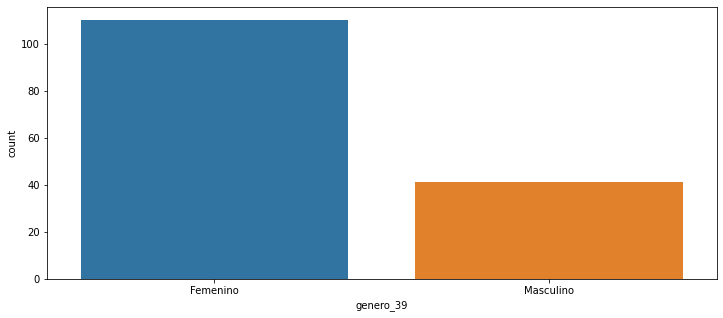

In [ ]:

plt.figure(figsize=(12,5))
sns.countplot("genero_39", data=datos)
plt.show()

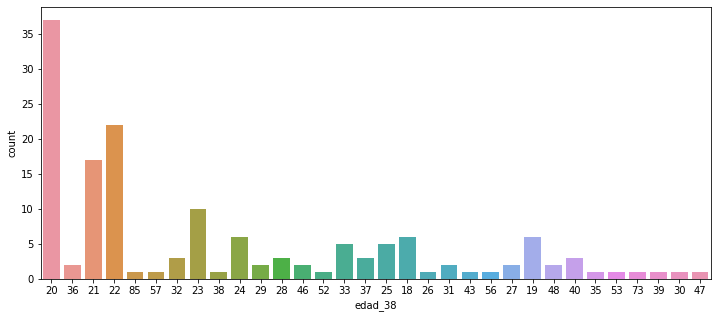

In [ ]:

plt.figure(figsize=(12,5))
sns.countplot("edad_38", data=datos)
plt.show()

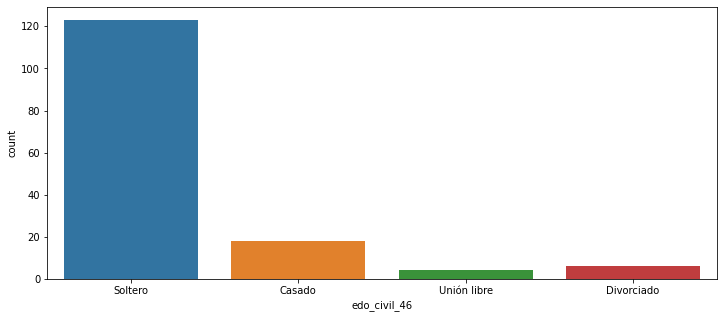

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot("edo_civil_46", data=datos)
plt.show()

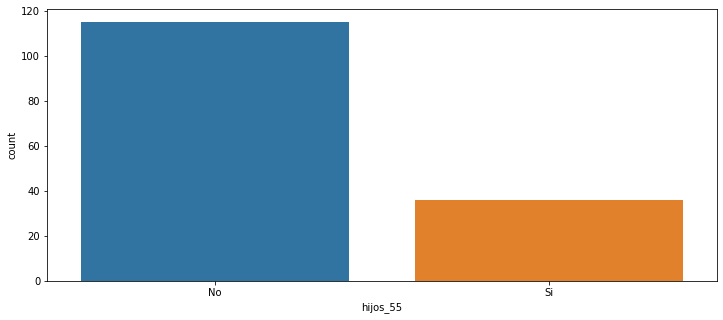

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot("hijos_55", data=datos)
plt.show()

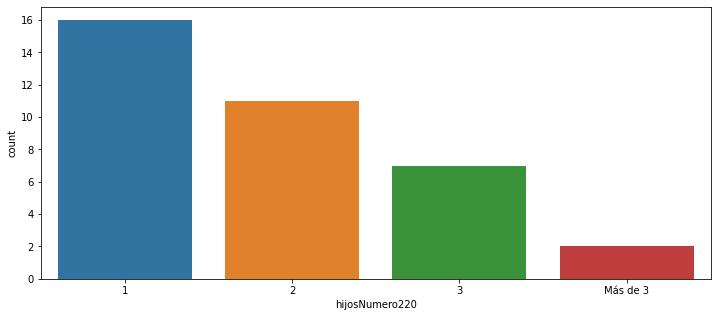

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot("hijosNumero220", data=datos)
plt.show()

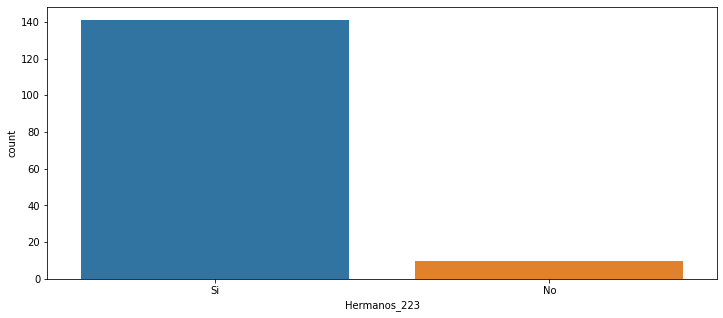

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot("Hermanos_223", data=datos)
plt.show()

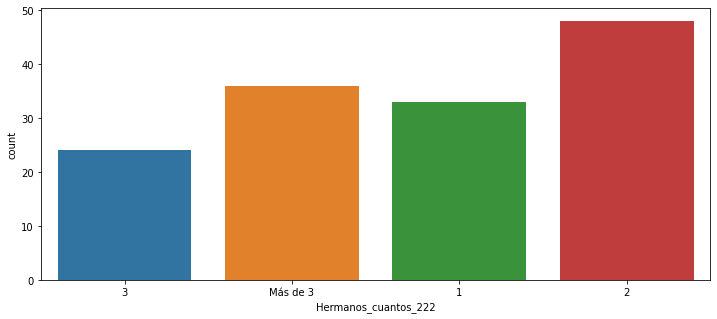

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot("Hermanos_cuantos_222", data=datos)
plt.show()

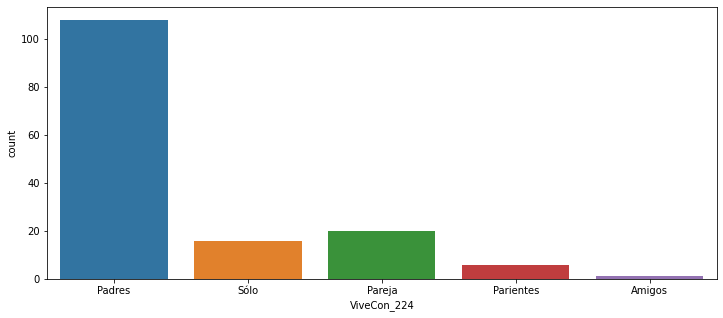

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot("ViveCon_224", data=datos)
plt.show()

#### Aspectos eductivos

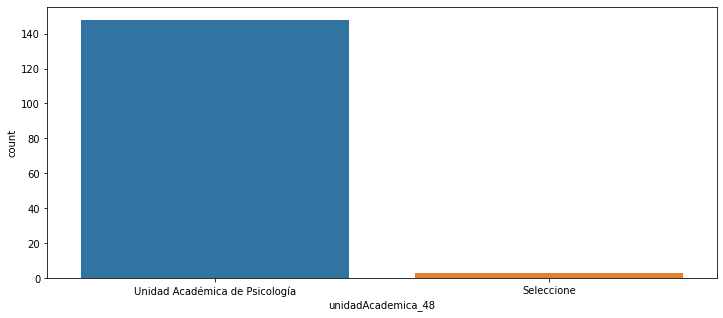

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot("unidadAcademica_48", data=datos)
plt.show()

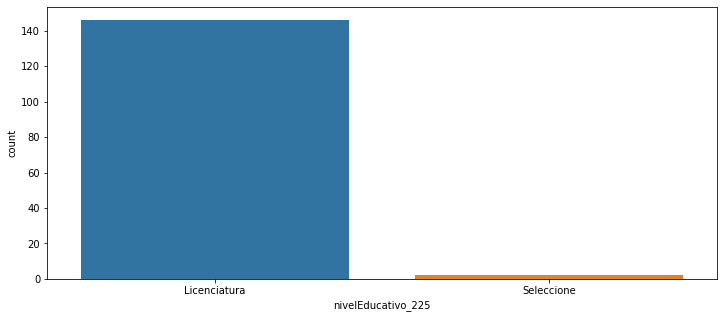

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot("nivelEducativo_225", data=datos)
plt.show()

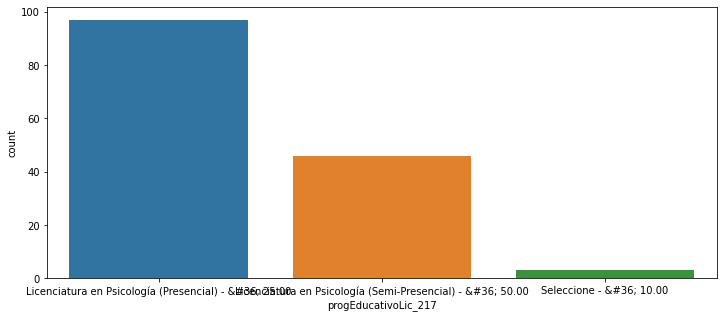

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot("progEducativoLic_217", data=datos)
plt.show()

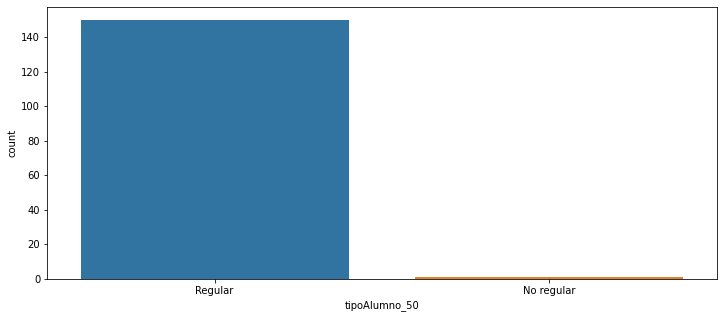

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot("tipoAlumno_50", data=datos)
plt.show()

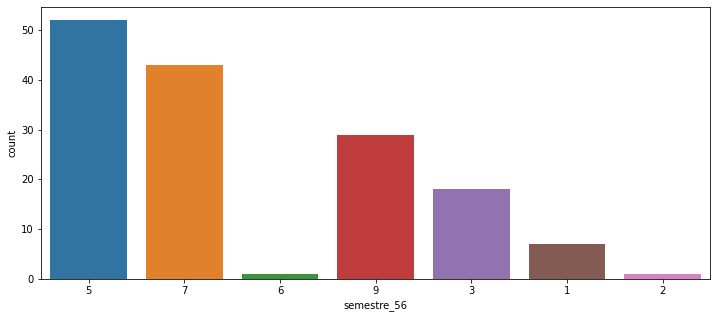

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot("semestre_56", data=datos)
plt.show()

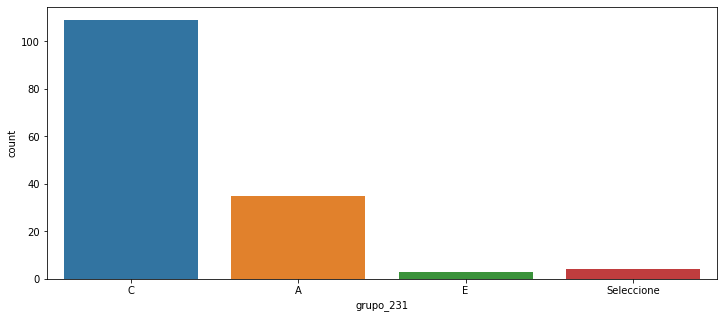

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot("grupo_231", data=datos)
plt.show()

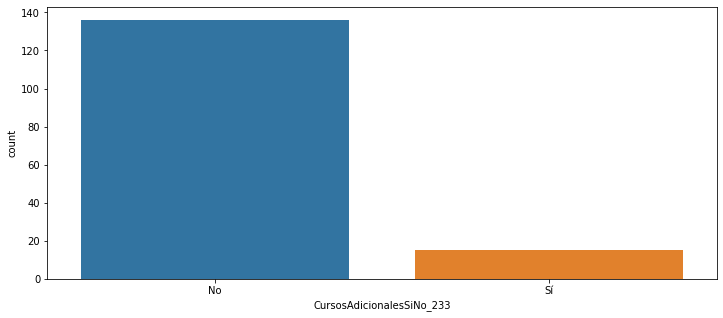

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot("CursosAdicionalesSiNo_233", data=datos)
plt.show()

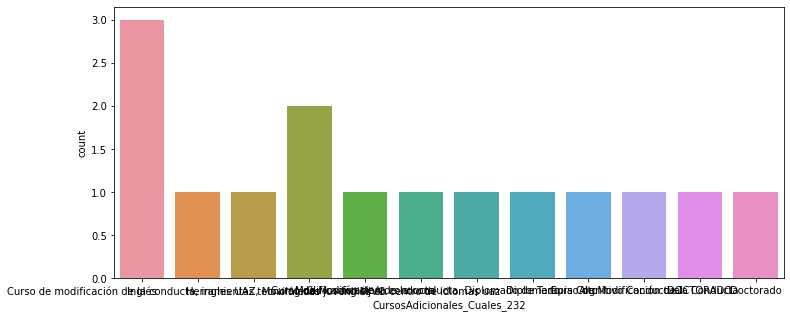

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot("CursosAdicionales_Cuales_232", data=datos)
plt.show()

#### Aspectos de conectividad

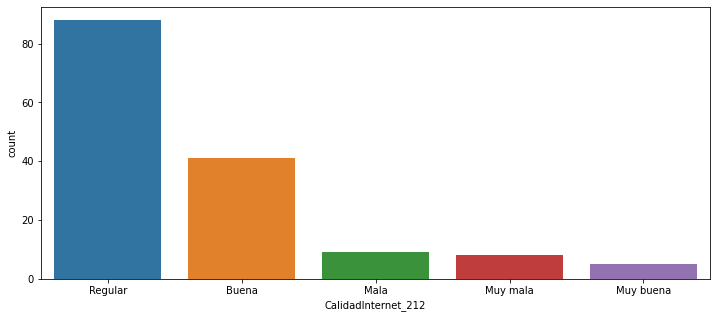

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot("CalidadInternet_212", data=datos)
plt.show()

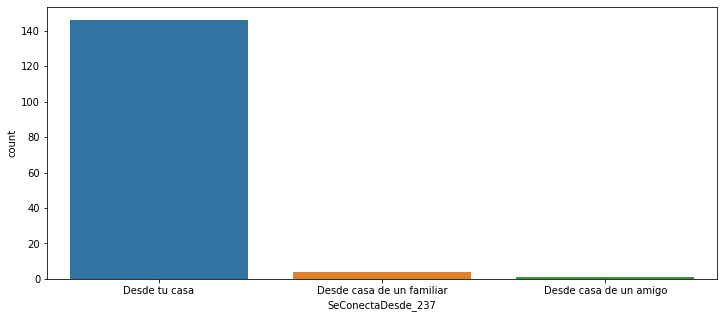

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot("SeConectaDesde_237", data=datos)
plt.show()

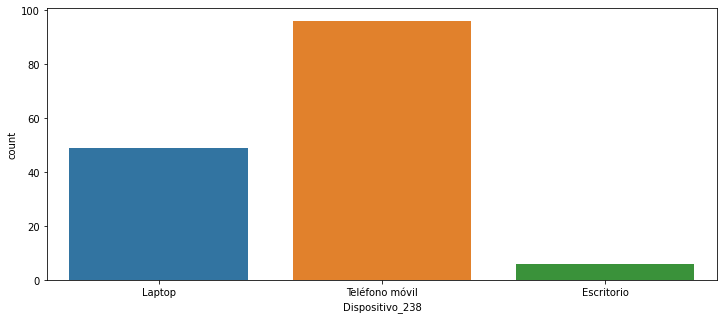

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot("Dispositivo_238", data=datos)
plt.show()

#### Etiqueta y preguntas

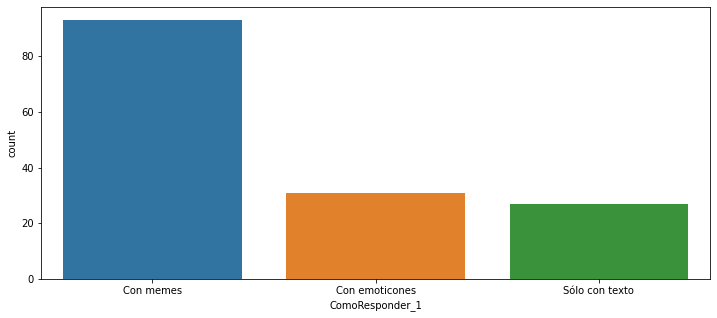

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot("ComoResponder_1", data=datos)
plt.show()

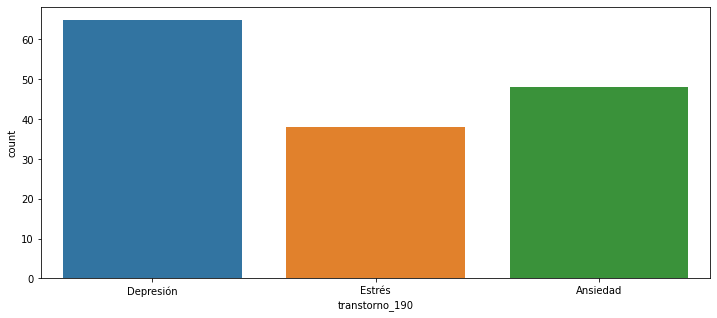

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot("transtorno_190", data=datos)
plt.show()

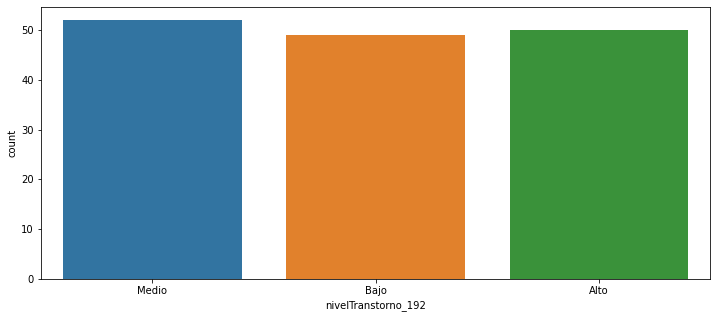

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot("nivelTranstorno_192", data=datos)
plt.show()

### Pruebas de modelos pre-entrenados

A continuación se listan algunos de los modelos a probar:

*   Español: Senti-Py (https://github.com/aylliote/senti-py)
*   Español: Sentiment Spanish (https://github.com/sentiment-analysis-spanish/sentiment-spanish)
*   Inglés: Tex-Blob (análisis por oraciones) https://pypi.org/project/textblob/
*   Inglés: Text-to-emotion (https://github.com/aman2656/text2emotion-library). Detecta emociones, entre ellas: (Angry, fear, happy, sad, surprise)


Para las herramientas se probará traduciendo el texto a inglés con:
* Google Translate: https://github.com/Scoefield/GoogleTransLibrary


#### Extracción de datos para pruebas

In [ ]:
datos["CampoAbiertoTexto_185"][0]

'Se pueden percibir 4 sujetos con angustia y al mismo tiempo sorpresa, pareciera que están viendo algo sorprendente pero al mismo tiempo desgarrador'

In [ ]:
# Se extraen los datos del campo abierto de texto del dataframe. Previamente se registraron varias frases de prueba simulando sentimientos positivos, negativos y neutros.

frase1=datos["CampoAbiertoTexto_185"][30]
frase2=datos["CampoAbiertoTexto_185"][31]
frase3=datos["CampoAbiertoTexto_185"][34]

print("Frase 1")
print(frase1)
print(" ")

print("Frase 2")
print(frase2)
print(" ")


print("Frase 3")
print(frase3)
print(" ")

Frase 1
Los alumnos parecen estresados durante la clase, la chica morenita parece que se molesta ante alguna situación (probablemente un trabajo de evaluación), mientras que la chica de al lado parece que está estresada por recibir más trabajo.
El chico de atrás de la chamarra azul se ve preocupado y muestra tensión en sus manos
 
Frase 2
Están desesperados, con ganas de relajarse, están demasiado estresados, tratan de estar tranquilos,  creo que tienen varios problemas
Pero no pueden dejar de concéntrese
 
Frase 3
El chico de en medio se ve muy angustiado, golpeado, podría percibir niveles de estrés y ansiedad muy elevados.
Es evidente que tiene días sin dormir, ve a la chica como si tuviera unas ganas enormes de hablar con ella o decirle algo en específico. 
Da la impresión de que la agresión está presente en su vida, no sólo por los golpes sino por la textura de sus manos. También se denota abrumado e inclusive con soledad de por medio.
 


#### Prueba modelos en español

##### Prueba de modelo pre-entrenado Senti-py

In [ ]:
# Instalación de librería

!pip install spanish_sentiment_analysis

In [ ]:
# Creación del modelo. El modelo ya se encuentra entrenado con expresiones en español latinoamericanas

from classifier import *

clf = SentimentClassifier()

In [ ]:
# Predicciones

print("Predicción frase 1")
print("Predicción: " + ' ==> %.5f' % clf.predict(frase1))

print("Predicción frase 2")
print("Predicción: " + ' ==> %.5f' % clf.predict(frase2))

print("Predicción frase 3")
print("Predicción: " + ' ==> %.5f' % clf.predict(frase3))


Predicción frase 1
Predicción:  ==> 0.00451
Predicción frase 2
Predicción:  ==> 0.46035
Predicción frase 3
Predicción:  ==> 0.19211


##### Prueba de modelo pre-entrenado Sentiment Spanish

In [ ]:
# Instalación
!pip install sentiment-analysis-spanish


     |████████████████████████████████| 15.1MB 450kB/s 


In [ ]:
# Importo librería
from sentiment_analysis_spanish import sentiment_analysis


In [ ]:
# Creación del modelo
sentiment = sentiment_analysis.SentimentAnalysisSpanish()


In [ ]:
# Prueba directa 1
print(sentiment.sentiment("me gusta la tombola es genial"))

0.66847324


In [ ]:
# Prueba directa 2
print(sentiment.sentiment("me parece terrible la situación actual del país"))

9.195515e-11


In [ ]:
# Predicciones

print("Predicción frase 1")
print("Predicción: " + ' ==> %.5f' % sentiment.sentiment(frase1))

print("Predicción frase 2")
print("Predicción: " + ' ==> %.5f' % sentiment.sentiment(frase2))

print("Predicción frase 3")
print("Predicción: " + ' ==> %.5f' % sentiment.sentiment(frase3))

Predicción frase 1
Predicción:  ==> 0.00032
Predicción frase 2
Predicción:  ==> 0.00003
Predicción frase 3
Predicción:  ==> 0.00000


#### Prueba modelos en inglés

In [ ]:
# Instalación librería para traducir (https://github.com/Scoefield/GoogleTransLibrary) # No funciona correctamente
# https://github.com/lushan88a/google_trans_new
!pip install google_trans_new


In [ ]:
from google_trans_new import google_translator  

translator = google_translator()  
translate_text = translator.translate('สวัสดีจีน',lang_tgt='en')  
print(translate_text)



Hello china 


In [ ]:
# Traducción de las frases

frase1_en=translator.translate(str(frase1), lang_tgt='en')

frase2_en=translator.translate(str(frase2), lang_tgt='en')

frase3_en=translator.translate(str(frase3), lang_tgt='en')


In [ ]:
# Imprimo frases en español e inglés


print("Frase positiva")
print("Original: ", frase1)
print("Traducción: ", frase1_en)
print(" ")

print("Frase negativa")
print("Original: ", frase2)
print("Traducción: ", frase2_en)
print(" ")


print("Frase neutra")
print("Original: ", frase3)
print("Traducción: ", frase3_en)
print(" ")

Frase positiva
Original:  Los alumnos parecen estresados durante la clase, la chica morenita parece que se molesta ante alguna situación (probablemente un trabajo de evaluación), mientras que la chica de al lado parece que está estresada por recibir más trabajo.
El chico de atrás de la chamarra azul se ve preocupado y muestra tensión en sus manos
Traducción:  The students seem stressed during class, the brunette girl seems to be upset by some situation (probably an assessment work), while the girl next door seems to be stressed by receiving more work.  The boy in the back in the blue jacket looks worried and shows tension in his hands 
 
Frase negativa
Original:  Están desesperados, con ganas de relajarse, están demasiado estresados, tratan de estar tranquilos,  creo que tienen varios problemas
Pero no pueden dejar de concéntrese
Traducción:  They are desperate, wanting to relax, they are too stressed, they try to be calm, I think they have several problems  But they can't help but foc

##### Prueba modelo pre-entrenado TextBlob
 Este modelo divide todo el texto en oraciones y hace el análisis independiente de cada una

In [ ]:

# Instalación 
!pip install textblob


In [ ]:
# Importo librería
from textblob import TextBlob

In [ ]:
# Predicciones

print("Frase 1")
blob1 = TextBlob(frase1_en)
for sentence in blob1.sentences:
    print(sentence, "//Polaridad: ", sentence.sentiment.polarity)

print(" ")
print("Frase 2")
blob2 = TextBlob(frase2_en)
for sentence in blob2.sentences:
    print(sentence, "//Polaridad: ", sentence.sentiment.polarity)

print(" ")
print("Frase 3")
blob3 = TextBlob(frase3_en)
for sentence in blob3.sentences:
    print(sentence, "//Polaridad: ", sentence.sentiment.polarity)



Frase 1
The students seem stressed during class, the brunette girl seems to be upset by some situation (probably an assessment work), while the girl next door seems to be stressed by receiving more work. //Polaridad:  0.25
The boy in the back in the blue jacket looks worried and shows tension in his hands //Polaridad:  0.0
 
Frase 2
They are desperate, wanting to relax, they are too stressed, they try to be calm, I think they have several problems  But they can't help but focus //Polaridad:  -0.09999999999999998
 
Frase 3
The boy in the middle looks very distressed, beaten, could perceive very high levels of stress and anxiety. //Polaridad:  0.136
It is evident that he has days without sleep, he sees the girl as if he had a great desire to talk to her or tell her something specific. //Polaridad:  0.35000000000000003
He gives the impression that aggression is present in his life, not only because of the blows but because of the texture of his hands. //Polaridad:  0.0
He is also denoted 

##### Prueba modelo pre-entrenado text-to-emotion




In [ ]:
# Instalación
!pip install text2emotion

In [ ]:
# Importo librería

import text2emotion as te

In [ ]:
# Prueba 

text = "I was asked to sign a third party contract a week out from stay. If it wasn't an 8 person group that took a lot of wrangling I would have cancelled the booking straight away. Bathrooms - there are no stand alone bathrooms. Please consider this - you have to clear out the main bedroom to use that bathroom. Other option is you walk through a different bedroom to get to its en-suite. Signs all over the apartment - there are signs everywhere - some helpful - some telling you rules. Perhaps some people like this but It negatively affected our enjoyment of the accommodation. Stairs - lots of them - some had slightly bending wood which caused a minor injury."
test1=te.get_emotion(text)
print(test1)


{'Happy': 0.04, 'Angry': 0.12, 'Surprise': 0.08, 'Sad': 0.33, 'Fear': 0.42}


In [ ]:
# Predicciones

text1 = frase1_en
text2 = frase2_en
text3 = frase3_en
pred1=te.get_emotion(text1)
pred2=te.get_emotion(text2)
pred3=te.get_emotion(text3)



In [ ]:
# Imprimo resultados
print("Predicción frase 1")
print("Predicción: ", pred1)
print(" ")

print("Predicción frase 2")
print("Predicción: ", pred2)
print(" ")


print("Predicción frase 3")
print("Predicción: ", pred3)

Predicción frase 1
Predicción:  {'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.29, 'Sad': 0.36, 'Fear': 0.36}
 
Predicción frase 2
Predicción:  {'Happy': 0.2, 'Angry': 0.0, 'Surprise': 0.4, 'Sad': 0.0, 'Fear': 0.4}
 
Predicción frase 3
Predicción:  {'Happy': 0.08, 'Angry': 0.0, 'Surprise': 0.33, 'Sad': 0.33, 'Fear': 0.25}


### Planteamiento de modelos

#### Generación de conjunto de datos



*   Teniendo en cuenta que las preguntas para cada opción de respuesta son independientes (texto, emoticon y meme) se requiere hacer combinar las tres columnas de cada pregunta en una única columna por pregunta



In [ ]:
datos.head(15)

,userID,ComoResponder_1,Ansiedad_E_P1_20,Ansiedad_M_P1_21,Estres_M_P5_24,edad_38,genero_39,email_40,cel_42,edo_civil_46,unidadAcademica_48,tipoAlumno_50,IP_53,hijos_55,semestre_56,Ansiedad_T_P1_68,Ansiedad_T_P2_69,Ansiedad_T_P3_70,Ansiedad_T_P4_71,Ansiedad_T_P5_72,Depresion_T_P1_76,Depresion_T_P4_77,Depresion_T_P3_78,Depresion_T_P5_80,Depresion_T_P7_81,Estres_T_P3_83,Estres_T_P1_84,Estres_T_P7_85,Estres_T_P4_86,Estres_T_P5_87,Estres_T_P6_89,Depresion_E_P5_92,Depresion_E_P6_93,Depresion_E_P3_94,Estres_E_P1_95,Depresion_E_P2_96,Depresion_E_P4_97,Depresion_E_P1_98,Estres_E_P4_104,Estres_E_P3_105,...,Ansiedad_M_P3_141,Ansiedad_E_P4_142,Ansiedad_M_P5_143,Ansiedad_E_P5_144,Ansiedad_M_P6_145,Ansiedad_T_P7_147,Ansiedad_T_P6_148,Ansiedad_E_P6_149,Ansiedad_E_P7_150,Ansiedad_M_P7_151,Ansiedad_M_P4_159,Estres_M_P1_160,Depresion_M_P2_161,Depresion_T_P2_167,Depresion_T_P6_168,Depresion_E_P7_169,Depresion_M_P6_171,Depresion_M_P5_172,Depresion_M_P7_173,Depresion_M_P4_174,Depresion_M_P3_175,Estres_E_P7_183,Estres_E_P6_184,CampoAbiertoTexto_185,Ubicacion_188,transtorno_190,nivelTranstorno_192,Estres_T_P2_210,CalidadInternet_212,progEducativoLic_217,hijosNumero220,Hermanos_cuantos_222,Hermanos_223,ViveCon_224,nivelEducativo_225,grupo_231,CursosAdicionales_Cuales_232,CursosAdicionalesSiNo_233,SeConectaDesde_237,Dispositivo_238
0,139,Con memes,NaN,NaN,NaN,20,Femenino,apvillagrana10@gmail.com,4921600629,Soltero,Unidad Académica de Psicología,Regular,177.227.65.162,No,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Algunas veces,NaN,NaN,NaN,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Algunas veces,NaN,NaN,Se pueden percibir 4 sujetos con angustia y al...,{entry_geolocation},Depresión,Medio,NaN,Regular,Licenciatura en Psicología (Presencial) - &#36...,NaN,3,Si,Padres,Licenciatura,C,NaN,No,Desde tu casa,Laptop
1,175,Con memes,NaN,NaN,NaN,36,Femenino,joshua1virginia@gmail.com,4929097527,Soltero,Unidad Académica de Psicología,Regular,177.242.158.205,Si,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nunca,NaN,NaN,NaN,Nunca,Pocas veces,Nunca,Nunca,Pocas veces,NaN,NaN,La niña magaly encontrandoce en la escuela rec...,{entry_geolocation},Depresión,Bajo,NaN,Regular,Licenciatura en Psicología (Semi-Presencial) -...,1,Más de 3,Si,Padres,Licenciatura,A,NaN,No,Desde tu casa,Teléfono móvil
2,94,Con memes,NaN,NaN,Nunca,21,Femenino,guadianita67@gmail.com,+524921969306,Soltero,Unidad Académica de Psicología,Regular,181.236.184.82,No,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nunca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Se nota una persona que se encuetra tranquila,...",{entry_geolocation},Estrés,Bajo,NaN,Regular,Licenciatura en Psicología (Presencial) - &#36...,NaN,1,Si,Padres,Licenciatura,C,NaN,No,Desde tu casa,Escritorio
3,85,Con memes,NaN,NaN,Nunca,20,Femenino,pahnv17@outlook.com,+524922188423,Soltero,Unidad Académica de Psicología,Regular,181.236.184.82,No,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nunca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Creo que en la imagen se muestran varios alumn...,{entry_geolocation},Estrés,Bajo,NaN,Regular,Licenciatura en Psicología (Presencial) - &#36...,NaN,NaN,No,Padres,Licenciatura,C,Inglés,Sí,Desde casa de un familiar,Laptop
4,107,Con memes,NaN,NaN,Algunas veces,20,Femenino,airamjasso07@gmail.com,+524922678711,Soltero,Unidad Académica de Psicología,Regular,181.236.184.82,No,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Algunas veces,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"En un sa

In [ ]:
# Reemplazo valores NA por valores vacíos
datos_sinNA=datos.fillna("")

In [ ]:
# Prueba combinación de columnas por pregunta

str(datos_sinNA['Ansiedad_T_P1_68'][8]) +str(datos_sinNA['Ansiedad_E_P1_20'][8]) + str(datos_sinNA['Ansiedad_M_P1_21'][8])

'Siempre'

In [ ]:
datos_sinNA['Ansiedad_P1']=datos_sinNA['Ansiedad_T_P1_68'] +datos_sinNA['Ansiedad_E_P1_20']+ datos_sinNA['Ansiedad_M_P1_21']


In [ ]:
# Combino columnas y creo una nueva para cada pregunta

#Ansiedad

datos_sinNA['Ansiedad_P1']=datos_sinNA['Ansiedad_T_P1_68'] +datos_sinNA['Ansiedad_E_P1_20'] + datos_sinNA['Ansiedad_M_P1_21']
datos_sinNA['Ansiedad_P2']=datos_sinNA['Ansiedad_T_P2_69'] +datos_sinNA['Ansiedad_E_P2_136'] + datos_sinNA['Ansiedad_M_P2_137']
datos_sinNA['Ansiedad_P3']=datos_sinNA['Ansiedad_T_P3_70'] +datos_sinNA['Ansiedad_E_P3_140'] + datos_sinNA['Ansiedad_M_P3_141']
datos_sinNA['Ansiedad_P4']=datos_sinNA['Ansiedad_T_P4_71'] +datos_sinNA['Ansiedad_E_P4_142'] + datos_sinNA['Ansiedad_M_P4_159']
datos_sinNA['Ansiedad_P5']=datos_sinNA['Ansiedad_T_P5_72'] +datos_sinNA['Ansiedad_E_P5_144'] + datos_sinNA['Ansiedad_M_P5_143']
datos_sinNA['Ansiedad_P6']=datos_sinNA['Ansiedad_T_P6_148'] +datos_sinNA['Ansiedad_E_P6_149'] + datos_sinNA['Ansiedad_M_P6_145']
datos_sinNA['Ansiedad_P7']=datos_sinNA['Ansiedad_T_P7_147'] +datos_sinNA['Ansiedad_E_P7_150'] + datos_sinNA['Ansiedad_M_P7_151']

# Estrés
datos_sinNA['Estres_P1']=datos_sinNA['Estres_T_P1_84'] +datos_sinNA['Estres_E_P1_95'] + datos_sinNA['Estres_M_P1_160']
datos_sinNA['Estres_P2']=datos_sinNA['Estres_T_P2_210'] +datos_sinNA['Estres_E_P2_107'] + datos_sinNA['Estres_M_P2_117']
datos_sinNA['Estres_P3']=datos_sinNA['Estres_T_P3_83'] +datos_sinNA['Estres_E_P3_105'] + datos_sinNA['Estres_M_P3_118']
datos_sinNA['Estres_P4']=datos_sinNA['Estres_T_P4_86'] +datos_sinNA['Estres_E_P4_104'] + datos_sinNA['Estres_M_P4_116']
datos_sinNA['Estres_P5']=datos_sinNA['Estres_T_P5_87'] +datos_sinNA['Estres_E_P5_106'] + datos_sinNA['Estres_M_P5_24']
datos_sinNA['Estres_P6']=datos_sinNA['Estres_T_P6_89'] +datos_sinNA['Estres_E_P6_184'] + datos_sinNA['Estres_M_P6_124']
datos_sinNA['Estres_P7']=datos_sinNA['Estres_T_P7_85'] +datos_sinNA['Estres_E_P7_183'] + datos_sinNA['Estres_M_P7_114']

# Depresión
datos_sinNA['Depresion_P1']=datos_sinNA['Depresion_T_P1_76'] +datos_sinNA['Depresion_E_P1_98'] + datos_sinNA['Depresion_M_P1_119']
datos_sinNA['Depresion_P2']=datos_sinNA['Depresion_T_P2_167'] +datos_sinNA['Depresion_E_P2_96'] + datos_sinNA['Depresion_M_P2_161']
datos_sinNA['Depresion_P3']=datos_sinNA['Depresion_T_P3_78'] +datos_sinNA['Depresion_E_P3_94'] + datos_sinNA['Depresion_M_P3_175']
datos_sinNA['Depresion_P4']=datos_sinNA['Depresion_T_P4_77'] +datos_sinNA['Depresion_E_P4_97'] + datos_sinNA['Depresion_M_P4_174']
datos_sinNA['Depresion_P5']=datos_sinNA['Depresion_T_P5_80'] +datos_sinNA['Depresion_E_P5_92'] + datos_sinNA['Depresion_M_P5_172']
datos_sinNA['Depresion_P6']=datos_sinNA['Depresion_T_P6_168'] +datos_sinNA['Depresion_E_P6_93'] + datos_sinNA['Depresion_M_P6_171']
datos_sinNA['Depresion_P7']=datos_sinNA['Depresion_T_P7_81'] +datos_sinNA['Depresion_E_P7_169'] + datos_sinNA['Depresion_M_P7_173']



In [ ]:
# Creo columna con rango de edades (cada 10 años)
# Columna edad: edad_38
bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
datos_sinNA['agerange'] = pd.cut(datos_sinNA.edad_38.astype(int), bins, labels = labels,include_lowest = True)

In [ ]:
# Combino etiquetas de trastorno con nivel

datos_sinNA['transtorno_y_nivel']=datos_sinNA['transtorno_190'] +"_"+ datos_sinNA['nivelTranstorno_192']

In [ ]:
datos_sinNA.head()

,userID,ComoResponder_1,Ansiedad_E_P1_20,Ansiedad_M_P1_21,Estres_M_P5_24,edad_38,genero_39,email_40,cel_42,edo_civil_46,unidadAcademica_48,tipoAlumno_50,IP_53,hijos_55,semestre_56,Ansiedad_T_P1_68,Ansiedad_T_P2_69,Ansiedad_T_P3_70,Ansiedad_T_P4_71,Ansiedad_T_P5_72,Depresion_T_P1_76,Depresion_T_P4_77,Depresion_T_P3_78,Depresion_T_P5_80,Depresion_T_P7_81,Estres_T_P3_83,Estres_T_P1_84,Estres_T_P7_85,Estres_T_P4_86,Estres_T_P5_87,Estres_T_P6_89,Depresion_E_P5_92,Depresion_E_P6_93,Depresion_E_P3_94,Estres_E_P1_95,Depresion_E_P2_96,Depresion_E_P4_97,Depresion_E_P1_98,Estres_E_P4_104,Estres_E_P3_105,...,CampoAbiertoTexto_185,Ubicacion_188,transtorno_190,nivelTranstorno_192,Estres_T_P2_210,CalidadInternet_212,progEducativoLic_217,hijosNumero220,Hermanos_cuantos_222,Hermanos_223,ViveCon_224,nivelEducativo_225,grupo_231,CursosAdicionales_Cuales_232,CursosAdicionalesSiNo_233,SeConectaDesde_237,Dispositivo_238,Ansiedad_P1,Ansiedad_P2,Ansiedad_P3,Ansiedad_P4,Ansiedad_P5,Ansiedad_P6,Ansiedad_P7,Estres_P1,Estres_P2,Estres_P3,Estres_P4,Estres_P5,Estres_P6,Estres_P7,Depresion_P1,Depresion_P2,Depresion_P3,Depresion_P4,Depresion_P5,Depresion_P6,Depresion_P7,agerange,transtorno_y_nivel
0,139,Con memes,,,,20,Femenino,apvillagrana10@gmail.com,4921600629,Soltero,Unidad Académica de Psicología,Regular,177.227.65.162,No,5,,,,,,,,,,,,,,,,,,,,,,,,,,...,Se pueden percibir 4 sujetos con angustia y al...,{entry_geolocation},Depresión,Medio,,Regular,Licenciatura en Psicología (Presencial) - &#36...,,3,Si,Padres,Licenciatura,C,,No,Desde tu casa,Laptop,,,,,,,,,,,,,,,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Algunas veces,18-29,Depresión_Medio
1,175,Con memes,,,,36,Femenino,joshua1virginia@gmail.com,4929097527,Soltero,Unidad Académica de Psicología,Regular,177.242.158.205,Si,7,,,,,,,,,,,,,,,,,,,,,,,,,,...,La niña magaly encontrandoce en la escuela rec...,{entry_geolocation},Depresión,Bajo,,Regular,Licenciatura en Psicología (Semi-Presencial) -...,1,Más de 3,Si,Padres,Licenciatura,A,,No,Desde tu casa,Teléfono móvil,,,,,,,,,,,,,,,Nunca,Nunca,Pocas veces,Nunca,Pocas veces,Nunca,Nunca,30-39,Depresión_Bajo
2,94,Con memes,,,Nunca,21,Femenino,guadianita67@gmail.com,+524921969306,Soltero,Unidad Académica de Psicología,Regular,181.236.184.82,No,5,,,,,,,,,,,,,,,,,,,,,,,,,,...,"Se nota una persona que se encuetra tranquila,...",{entry_geolocation},Estrés,Bajo,,Regular,Licenciatura en Psicología (Presencial) - &#36...,,1,Si,Padres,Licenciatura,C,,No,Desde tu casa,Escritorio,,,,,,,,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,,,,,,,,18-29,Estrés_Bajo
3,85,Con memes,,,Nunca,20,Femenino,pahnv17@outlook.com,+524922188423,Soltero,Unidad Académica de Psicología,Regular,181.236.184.82,No,5,,,,,,,,,,,,,,,,,,,,,,,,,,...,Creo que en la imagen se muestran varios alumn...,{entry_geolocation},Estrés,Bajo,,Regular,Licenciatura en Psicología (Presencial) - &#36...,,,No,Padres,Licenciatura,C,Inglés,Sí,Desde casa de un familiar,Laptop,,,,,,,,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,,,,,,,,18-29,Estrés_Bajo
4,107,Con memes,,,Algunas veces,20,Femenino,airamjasso07@gmail.com,+524922678711,Soltero,Unidad Académica de Psicología,Regular,181.236.184.82,No,6,,,,,,,,,,,,,,,,,,,,,,,,,,...,"En un salón de clases están varios chavos, una...",{entry_geolocation},Estrés,Medio,,Buena,Licenciatura en Psicología (Presencial) - &#36...,,2,Si,Padres,Licenciatura,C,,No,Desde tu casa,Laptop,,,,,,,,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Algunas veces,,,,,,,,18-29,Estrés_Medio


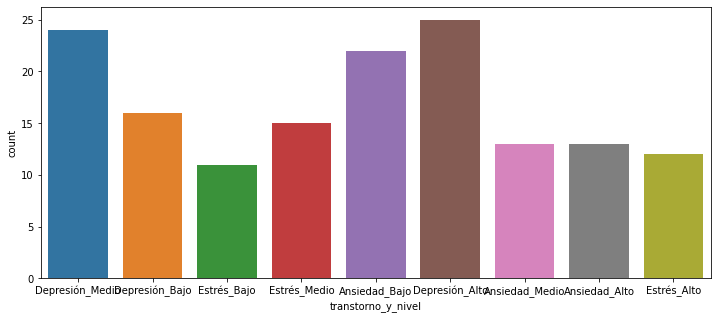

In [ ]:
# Etiquetas + nivel
plt.figure(figsize=(12,5))
sns.countplot("transtorno_y_nivel", data=datos_sinNA)
plt.show()

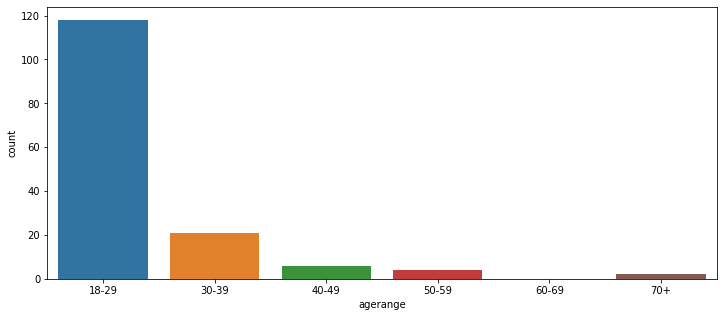

In [ ]:
# Rangos de edades
plt.figure(figsize=(12,5))
sns.countplot("agerange", data=datos_sinNA)
plt.show()

In [ ]:
# Creo dataframe para entrenamiento de modelos

lista_cols_entrenamiento=[
            "agerange", # utilizo agerange en lugar de edad
            "genero_39",
            "edo_civil_46",
            "hijos_55",
            "Hermanos_223",
            "ViveCon_224", 
            "CursosAdicionalesSiNo_233",          
            "semestre_56",
            "CalidadInternet_212",
            "SeConectaDesde_237",
            "Dispositivo_238",
            "ComoResponder_1",

            "Ansiedad_P1",
            "Ansiedad_P2",
            "Ansiedad_P3",
            "Ansiedad_P4",
            "Ansiedad_P5",
            "Ansiedad_P6",
            "Ansiedad_P7",

            "Estres_P1",
            "Estres_P2",
            "Estres_P3",
            "Estres_P4",
            "Estres_P5",
            "Estres_P6",            
            "Estres_P7",

            "Depresion_P1",
            "Depresion_P2",
            "Depresion_P3",
            "Depresion_P4",
            "Depresion_P5",
            "Depresion_P6",
            "Depresion_P7",

            "CampoAbiertoTexto_185", 
            "transtorno_190",
            "nivelTranstorno_192",
            "transtorno_y_nivel"

]


In [ ]:
# Creo dataframe con datos para trabajar

datos_trabajo=datos_sinNA[lista_cols_entrenamiento]

datos_trabajo.shape

(151, 37)

In [ ]:
datos_trabajo.head()

,agerange,genero_39,edo_civil_46,hijos_55,Hermanos_223,ViveCon_224,CursosAdicionalesSiNo_233,semestre_56,CalidadInternet_212,SeConectaDesde_237,Dispositivo_238,ComoResponder_1,Ansiedad_P1,Ansiedad_P2,Ansiedad_P3,Ansiedad_P4,Ansiedad_P5,Ansiedad_P6,Ansiedad_P7,Estres_P1,Estres_P2,Estres_P3,Estres_P4,Estres_P5,Estres_P6,Estres_P7,Depresion_P1,Depresion_P2,Depresion_P3,Depresion_P4,Depresion_P5,Depresion_P6,Depresion_P7,CampoAbiertoTexto_185,transtorno_190,nivelTranstorno_192,transtorno_y_nivel
0,18-29,Femenino,Soltero,No,Si,Padres,No,5,Regular,Desde tu casa,Laptop,Con memes,,,,,,,,,,,,,,,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Se pueden percibir 4 sujetos con angustia y al...,Depresión,Medio,Depresión_Medio
1,30-39,Femenino,Soltero,Si,Si,Padres,No,7,Regular,Desde tu casa,Teléfono móvil,Con memes,,,,,,,,,,,,,,,Nunca,Nunca,Pocas veces,Nunca,Pocas veces,Nunca,Nunca,La niña magaly encontrandoce en la escuela rec...,Depresión,Bajo,Depresión_Bajo
2,18-29,Femenino,Soltero,No,Si,Padres,No,5,Regular,Desde tu casa,Escritorio,Con memes,,,,,,,,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,,,,,,,,"Se nota una persona que se encuetra tranquila,...",Estrés,Bajo,Estrés_Bajo
3,18-29,Femenino,Soltero,No,No,Padres,Sí,5,Regular,Desde casa de un familiar,Laptop,Con memes,,,,,,,,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,,,,,,,,Creo que en la imagen se muestran varios alumn...,Estrés,Bajo,Estrés_Bajo
4,18-29,Femenino,Soltero,No,Si,Padres,No,6,Buena,Desde tu casa,Laptop,Con memes,,,,,,,,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Algunas veces,,,,,,,,"En un salón de clases están varios chavos, una...",Estrés,Medio,Estrés_Medio


In [ ]:
#Un resumen de todos los datos
datos_trabajo.describe(include = 'all')

,agerange,genero_39,edo_civil_46,hijos_55,Hermanos_223,ViveCon_224,CursosAdicionalesSiNo_233,semestre_56,CalidadInternet_212,SeConectaDesde_237,Dispositivo_238,ComoResponder_1,Ansiedad_P1,Ansiedad_P2,Ansiedad_P3,Ansiedad_P4,Ansiedad_P5,Ansiedad_P6,Ansiedad_P7,Estres_P1,Estres_P2,Estres_P3,Estres_P4,Estres_P5,Estres_P6,Estres_P7,Depresion_P1,Depresion_P2,Depresion_P3,Depresion_P4,Depresion_P5,Depresion_P6,Depresion_P7,CampoAbiertoTexto_185,transtorno_190,nivelTranstorno_192,transtorno_y_nivel
count,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151,151
unique,5,2,4,2,2,5,2,7,5,3,3,3,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,149,3,3,9
top,18-29,Femenino,Soltero,No,Si,Padres,No,5,Regular,Desde tu casa,Teléfono móvil,Con memes,,,,,,,,,,,,,,,,,,,,,,Una persona preocupada que esta pensando en al...,Depresión,Medio,Depresión_Alto
freq,118,110,123,115,141,108,136,52,88,146,96,93,103,103,103,103,103,103,103,113,113,113,113,113,113,113,86,86,86,86,86,86,86,2,65,52,25


In [ ]:
# Variables categóricas
catFeature = datos_trabajo.columns[datos_trabajo.dtypes == object]
catFeature

Index(['genero_39', 'edo_civil_46', 'hijos_55', 'Hermanos_223', 'ViveCon_224',
       'CursosAdicionalesSiNo_233', 'semestre_56', 'CalidadInternet_212',
       'SeConectaDesde_237', 'Dispositivo_238', 'ComoResponder_1',
       'Ansiedad_P1', 'Ansiedad_P2', 'Ansiedad_P3', 'Ansiedad_P4',
       'Ansiedad_P5', 'Ansiedad_P6', 'Ansiedad_P7', 'Estres_P1', 'Estres_P2',
       'Estres_P3', 'Estres_P4', 'Estres_P5', 'Estres_P6', 'Estres_P7',
       'Depresion_P1', 'Depresion_P2', 'Depresion_P3', 'Depresion_P4',
       'Depresion_P5', 'Depresion_P6', 'Depresion_P7', 'CampoAbiertoTexto_185',
       'transtorno_190', 'nivelTranstorno_192', 'transtorno_y_nivel'],
      dtype='object')

In [ ]:
# Variables numéricas
conFeature = datos_trabajo.columns[datos_trabajo.dtypes != object]
conFeature

Index(['agerange'], dtype='object')

 Todas las variables son categóricas

In [ ]:
# Convierto variables categóricas a variables numéricas
catFeature.tolist()

['genero_39',
 'edo_civil_46',
 'hijos_55',
 'Hermanos_223',
 'ViveCon_224',
 'CursosAdicionalesSiNo_233',
 'semestre_56',
 'CalidadInternet_212',
 'SeConectaDesde_237',
 'Dispositivo_238',
 'ComoResponder_1',
 'Ansiedad_P1',
 'Ansiedad_P2',
 'Ansiedad_P3',
 'Ansiedad_P4',
 'Ansiedad_P5',
 'Ansiedad_P6',
 'Ansiedad_P7',
 'Estres_P1',
 'Estres_P2',
 'Estres_P3',
 'Estres_P4',
 'Estres_P5',
 'Estres_P6',
 'Estres_P7',
 'Depresion_P1',
 'Depresion_P2',
 'Depresion_P3',
 'Depresion_P4',
 'Depresion_P5',
 'Depresion_P6',
 'Depresion_P7',
 'CampoAbiertoTexto_185',
 'transtorno_190',
 'nivelTranstorno_192',
 'transtorno_y_nivel']

In [ ]:
# Codifico con diccionarios

# Diccionarios

cat_dict = {
  "Nunca": 1,
  "Algunas veces": 2,
  "Pocas veces": 3, 
  "Casi siempre": 4, 
  "Siempre": 5,
  "": 0,
}


agerange = {
  "18-29": 1,
  "30-39": 2,
  "40-49": 3, 
  "50-59": 4, 
  "60-69": 5, 
  "70+": 6,
}

como_responder = {
  "Con memes": 1,
  "Con emoticones": 2,
  "Sólo con texto": 3, 
}

genero = {
  "Femenino": 1,
  "Masculino": 2,
}

edoCivil = {
  "Soltero": 1,
  "Casado": 2,
  "Divorciado": 3,
  "Unión libre": 4,   
}

hijos = {
  "Si": 1,
  "No": 2,
}

hermanos = {
  "Si": 1,
  "No": 2,
}

calidadInternet = {
  "Regular": 1,
  "Buena": 2,
  "Mala": 3,
  "Muy mala": 4,
  "Muy buena": 5,
}

cursosAdicionales = {
  "Sí": 1,
  "No": 2,
}

conectaDesde = {
  "Desde tu casa": 1,
  "Desde casa de un familiar": 2,
  "Desde casa de un amigo": 3,
  "Desde un Internet Café": 4,
  "Desde red pública": 5,
}

dispositivo = {
  "Teléfono móvil": 1,
  "Laptop": 2,
  "Escritorio": 3,
  "Tableta": 4,
}

viveCon = {
  "Padres": 1,
  "Pareja": 2,
  "Sólo": 3, 
  "Parientes": 4, 
  "Amigos": 5, 
}

trastorno = {
  "Ansiedad": 1,
  "Estrés": 2,
  "Depresión": 3, 

}

nivel = {
  "Alto": 1,
  "Medio": 2,
  "Bajo": 3, 
}

trastorno_y_nivel = {
  "Ansiedad_Alto": 1,
  "Ansiedad_Medio": 2,
  "Ansiedad_Bajo": 3, 
  "Estrés_Alto": 4,
  "Estrés_Medio": 5,
  "Estrés_Bajo": 6,
  "Depresión_Alto": 7,
  "Depresión_Medio": 8,
  "Depresión_Bajo": 9, 
}

In [ ]:
# Diccionarios reversa para predicciones

trastorno_inv = {v: k for k, v in nivel.items()}

trastorno_y_nivel_inv = {v: k for k, v in trastorno_y_nivel.items()}

print(trastorno)

print(trastorno_y_nivel)

{'Ansiedad': 1, 'Estrés': 2, 'Depresión': 3}
{'Ansiedad_Alto': 1, 'Ansiedad_Medio': 2, 'Ansiedad_Bajo': 3, 'Estrés_Alto': 4, 'Estrés_Medio': 5, 'Estrés_Bajo': 6, 'Depresión_Alto': 7, 'Depresión_Medio': 8, 'Depresión_Bajo': 9}


In [ ]:
datos_trabajo.head()

,agerange,genero_39,edo_civil_46,hijos_55,Hermanos_223,ViveCon_224,CursosAdicionalesSiNo_233,semestre_56,CalidadInternet_212,SeConectaDesde_237,Dispositivo_238,ComoResponder_1,Ansiedad_P1,Ansiedad_P2,Ansiedad_P3,Ansiedad_P4,Ansiedad_P5,Ansiedad_P6,Ansiedad_P7,Estres_P1,Estres_P2,Estres_P3,Estres_P4,Estres_P5,Estres_P6,Estres_P7,Depresion_P1,Depresion_P2,Depresion_P3,Depresion_P4,Depresion_P5,Depresion_P6,Depresion_P7,CampoAbiertoTexto_185,transtorno_190,nivelTranstorno_192,transtorno_y_nivel
0,18-29,Femenino,Soltero,No,Si,Padres,No,5,Regular,Desde tu casa,Laptop,Con memes,,,,,,,,,,,,,,,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Se pueden percibir 4 sujetos con angustia y al...,Depresión,Medio,Depresión_Medio
1,30-39,Femenino,Soltero,Si,Si,Padres,No,7,Regular,Desde tu casa,Teléfono móvil,Con memes,,,,,,,,,,,,,,,Nunca,Nunca,Pocas veces,Nunca,Pocas veces,Nunca,Nunca,La niña magaly encontrandoce en la escuela rec...,Depresión,Bajo,Depresión_Bajo
2,18-29,Femenino,Soltero,No,Si,Padres,No,5,Regular,Desde tu casa,Escritorio,Con memes,,,,,,,,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,,,,,,,,"Se nota una persona que se encuetra tranquila,...",Estrés,Bajo,Estrés_Bajo
3,18-29,Femenino,Soltero,No,No,Padres,Sí,5,Regular,Desde casa de un familiar,Laptop,Con memes,,,,,,,,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,Nunca,,,,,,,,Creo que en la imagen se muestran varios alumn...,Estrés,Bajo,Estrés_Bajo
4,18-29,Femenino,Soltero,No,Si,Padres,No,6,Buena,Desde tu casa,Laptop,Con memes,,,,,,,,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Algunas veces,Algunas veces,,,,,,,,"En un salón de clases están varios chavos, una...",Estrés,Medio,Estrés_Medio


In [ ]:
# Aplico diccionarios para convertir categorías a números


datos_trabajo["Ansiedad_P1"] = datos_trabajo["Ansiedad_P1"].map(cat_dict)
datos_trabajo["Ansiedad_P2"] = datos_trabajo["Ansiedad_P2"].map(cat_dict)
datos_trabajo["Ansiedad_P3"] = datos_trabajo["Ansiedad_P3"].map(cat_dict)
datos_trabajo["Ansiedad_P4"] = datos_trabajo["Ansiedad_P4"].map(cat_dict)
datos_trabajo["Ansiedad_P5"] = datos_trabajo["Ansiedad_P5"].map(cat_dict)
datos_trabajo["Ansiedad_P6"] = datos_trabajo["Ansiedad_P6"].map(cat_dict)
datos_trabajo["Ansiedad_P7"] = datos_trabajo["Ansiedad_P7"].map(cat_dict)

datos_trabajo["Estres_P1"] = datos_trabajo["Estres_P1"].map(cat_dict)
datos_trabajo["Estres_P2"] = datos_trabajo["Estres_P2"].map(cat_dict)
datos_trabajo["Estres_P3"] = datos_trabajo["Estres_P3"].map(cat_dict)
datos_trabajo["Estres_P4"] = datos_trabajo["Estres_P4"].map(cat_dict)
datos_trabajo["Estres_P5"] = datos_trabajo["Estres_P5"].map(cat_dict)
datos_trabajo["Estres_P6"] = datos_trabajo["Estres_P6"].map(cat_dict)
datos_trabajo["Estres_P7"] = datos_trabajo["Estres_P7"].map(cat_dict)

datos_trabajo["Depresion_P1"] = datos_trabajo["Depresion_P1"].map(cat_dict)
datos_trabajo["Depresion_P2"] = datos_trabajo["Depresion_P2"].map(cat_dict)
datos_trabajo["Depresion_P3"] = datos_trabajo["Depresion_P3"].map(cat_dict)
datos_trabajo["Depresion_P4"] = datos_trabajo["Depresion_P4"].map(cat_dict)
datos_trabajo["Depresion_P5"] = datos_trabajo["Depresion_P5"].map(cat_dict)
datos_trabajo["Depresion_P6"] = datos_trabajo["Depresion_P6"].map(cat_dict)
datos_trabajo["Depresion_P7"] = datos_trabajo["Depresion_P7"].map(cat_dict)

datos_trabajo["agerange"] = datos_trabajo["agerange"].map(agerange)
datos_trabajo["ComoResponder_1"] = datos_trabajo["ComoResponder_1"].map(como_responder)
datos_trabajo["genero_39"] = datos_trabajo["genero_39"].map(genero)
datos_trabajo["edo_civil_46"] = datos_trabajo["edo_civil_46"].map(edoCivil)
datos_trabajo["hijos_55"] = datos_trabajo["hijos_55"].map(hijos)
datos_trabajo["Hermanos_223"] = datos_trabajo["Hermanos_223"].map(hermanos)
datos_trabajo["CalidadInternet_212"] = datos_trabajo["CalidadInternet_212"].map(calidadInternet)


datos_trabajo["ViveCon_224"] = datos_trabajo["ViveCon_224"].map(viveCon)
datos_trabajo["CursosAdicionalesSiNo_233"] = datos_trabajo["CursosAdicionalesSiNo_233"].map(cursosAdicionales)
datos_trabajo["SeConectaDesde_237"] = datos_trabajo["SeConectaDesde_237"].map(conectaDesde)
datos_trabajo["Dispositivo_238"] = datos_trabajo["Dispositivo_238"].map(dispositivo)

datos_trabajo["transtorno_190"] = datos_trabajo["transtorno_190"].map(trastorno)
datos_trabajo["nivelTranstorno_192"] = datos_trabajo["nivelTranstorno_192"].map(nivel)
datos_trabajo["transtorno_y_nivel"] = datos_trabajo["transtorno_y_nivel"].map(trastorno_y_nivel)


In [ ]:
datos_trabajo.head()

,agerange,genero_39,edo_civil_46,hijos_55,Hermanos_223,ViveCon_224,CursosAdicionalesSiNo_233,semestre_56,CalidadInternet_212,SeConectaDesde_237,Dispositivo_238,ComoResponder_1,Ansiedad_P1,Ansiedad_P2,Ansiedad_P3,Ansiedad_P4,Ansiedad_P5,Ansiedad_P6,Ansiedad_P7,Estres_P1,Estres_P2,Estres_P3,Estres_P4,Estres_P5,Estres_P6,Estres_P7,Depresion_P1,Depresion_P2,Depresion_P3,Depresion_P4,Depresion_P5,Depresion_P6,Depresion_P7,CampoAbiertoTexto_185,transtorno_190,nivelTranstorno_192,transtorno_y_nivel
0,1,1,1,2,1,1,2,5,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,Se pueden percibir 4 sujetos con angustia y al...,3,2,8
1,2,1,1,1,1,1,2,7,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,1,3,1,1,La niña magaly encontrandoce en la escuela rec...,3,3,9
2,1,1,1,2,1,1,2,5,1,1,3,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,"Se nota una persona que se encuetra tranquila,...",2,3,6
3,1,1,1,2,2,1,1,5,1,2,2,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,Creo que en la imagen se muestran varios alumn...,2,3,6
4,1,1,1,2,1,1,2,6,2,1,2,1,0,0,0,0,0,0,0,2,2,2,2,2,2,2,0,0,0,0,0,0,0,"En un salón de clases están varios chavos, una...",2,2,5


In [ ]:
# Creo vector para entrenar modelo

#Quito columnas de etiquetas a predecir
datos_trabajo_sin_etiquetas = datos_trabajo.drop(['transtorno_190', 'nivelTranstorno_192', 'CampoAbiertoTexto_185', "transtorno_y_nivel"], axis = 1) 
x = datos_trabajo_sin_etiquetas

In [ ]:
x.shape

(151, 33)

In [ ]:
# Separo datos para entrenamiento y test
from sklearn.model_selection import train_test_split


xTrain,xTest,yTrain,yTest = train_test_split(x,datos_trabajo['transtorno_190'],test_size=0.2, random_state=88 ) # Tiene en cuenta sólo el transtorno (3 etiquetas) - columna - transtorno

In [ ]:
xTrain2,xTest2,yTrain2,yTest2 = train_test_split(x,datos_trabajo['transtorno_y_nivel'],test_size=0.2, random_state=88 ) # Tiene en cuenta trastorno+ nivel (9 etiquetas) - columna transtorno_y_nivel

#### Árboles de decisión clasificación 3 etiquetas

In [ ]:
# Creación del modelo

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

modelTree = DecisionTreeClassifier(random_state=0)
modelTree.fit(xTrain, yTrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
# Predicción
predictTree = modelTree.predict(xTest)

In [ ]:
xTest.iloc[[0]]

,agerange,genero_39,edo_civil_46,hijos_55,Hermanos_223,ViveCon_224,CursosAdicionalesSiNo_233,semestre_56,CalidadInternet_212,SeConectaDesde_237,Dispositivo_238,ComoResponder_1,Ansiedad_P1,Ansiedad_P2,Ansiedad_P3,Ansiedad_P4,Ansiedad_P5,Ansiedad_P6,Ansiedad_P7,Estres_P1,Estres_P2,Estres_P3,Estres_P4,Estres_P5,Estres_P6,Estres_P7,Depresion_P1,Depresion_P2,Depresion_P3,Depresion_P4,Depresion_P5,Depresion_P6,Depresion_P7
84,1,1,1,2,1,1,2,5,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0


In [ ]:
modelTree.predict(xTest.iloc[[0]])

array([2])

In [ ]:
# Validación
pd.crosstab(yTest, predictTree, rownames=["Real"], colnames=["Predicho"])

Predicho,1,2,3
Real,,,
1,11,0,0
2,0,6,0
3,0,0,14


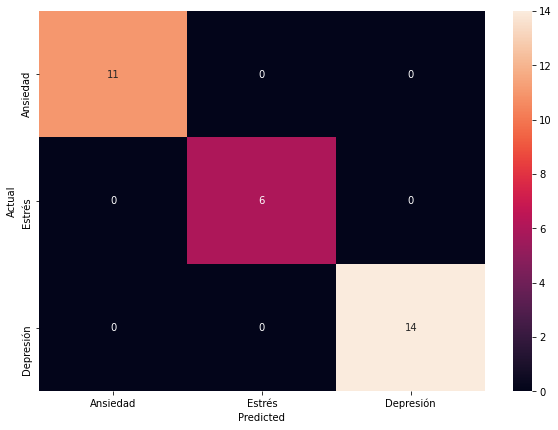

In [ ]:
# Gráfica de matriz de confución con seaborn
from sklearn.metrics import confusion_matrix

y_test=yTest
y_pred=predictTree
category_dict_labels=trastorno


conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_dict_labels, yticklabels=category_dict_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
text_representation_Dtree = tree.export_text(modelTree)
print(text_representation_Dtree)

|--- feature_30 <= 0.50
|   |--- feature_24 <= 0.50
|   |   |--- class: 1
|   |--- feature_24 >  0.50
|   |   |--- class: 2
|--- feature_30 >  0.50
|   |--- class: 3



#### Árboles de decisión clasificación 9 etiquetas



In [ ]:
modelTree2 = DecisionTreeClassifier(random_state=0)
modelTree2.fit(xTrain2, yTrain2)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
# Predicción
predictTree2 = modelTree2.predict(xTest2)

In [ ]:
# Validación
pd.crosstab(yTest2, predictTree2, rownames=["Real"], colnames=["Predicho"])

Predicho,1,2,3,4,5,6,7,8,9
Real,,,,,,,,,
1,2,0,0,0,0,0,0,0,0
2,2,0,1,0,0,0,0,0,0
3,0,2,4,0,0,0,0,0,0
4,0,0,0,2,0,0,0,0,0
5,0,0,0,1,2,0,0,0,0
6,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,8,0,1
8,0,0,0,0,0,0,0,4,0
9,0,0,0,0,0,0,0,0,1


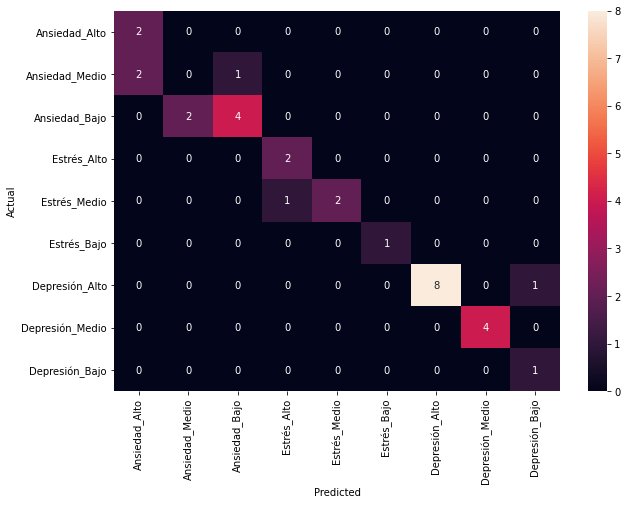

In [ ]:
# Gráfica de matriz de confución con seaborn
from sklearn.metrics import confusion_matrix

y_test=yTest2
y_pred=predictTree2
category_dict_labels=trastorno_y_nivel


conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_dict_labels, yticklabels=category_dict_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
text_representation_Dtree2 = tree.export_text(modelTree2)
print(text_representation_Dtree2)

|--- feature_30 <= 0.50
|   |--- feature_24 <= 0.50
|   |   |--- feature_16 <= 3.50
|   |   |   |--- feature_13 <= 1.50
|   |   |   |   |--- feature_12 <= 2.00
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- feature_12 >  2.00
|   |   |   |   |   |--- feature_14 <= 2.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_14 >  2.00
|   |   |   |   |   |   |--- class: 3
|   |   |   |--- feature_13 >  1.50
|   |   |   |   |--- feature_13 <= 2.50
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_13 >  2.50
|   |   |   |   |   |--- feature_11 <= 1.50
|   |   |   |   |   |   |--- feature_17 <= 3.50
|   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |--- feature_17 >  3.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_11 >  1.50
|   |   |   |   |   |   |--- feature_17 <= 3.50
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |--- feature_17 >  3.50
|   |   |   |   |   |   |   |--- feature_12 <=

#### Random Forest clasificación 3 etiquetas



In [ ]:
# Creación del modelo

from sklearn.ensemble import RandomForestClassifier

modelRFC = RandomForestClassifier(random_state=0)
modelRFC.fit(xTrain, yTrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# Predicción
predictRFC = modelRFC.predict(xTest)

In [ ]:
# Validación
confusionMatrixRFC = pd.crosstab(yTest, predictRFC, rownames=["Real"], colnames=["Predicho"])
confusionMatrixRFC

Predicho,1,2,3
Real,,,
1,11,0,0
2,0,6,0
3,0,0,14


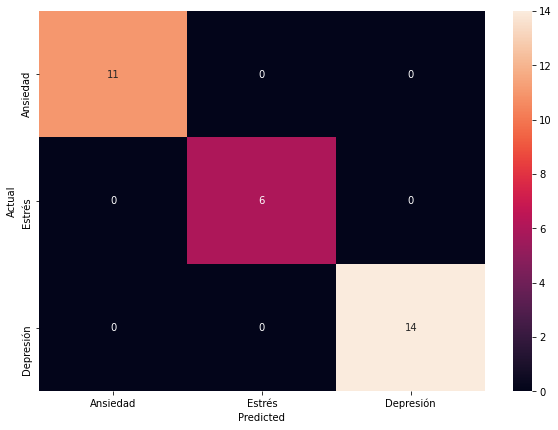

In [ ]:
# Gráfica de matriz de confución con seaborn
from sklearn.metrics import confusion_matrix

y_test=yTest
y_pred=predictRFC
category_dict_labels=trastorno


conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_dict_labels, yticklabels=category_dict_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### Random Forest clasificación 9 etiquetas


In [ ]:

modelRFC2 = RandomForestClassifier(random_state=0)
modelRFC2.fit(xTrain2, yTrain2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# Predicción
predictRFC2 = modelRFC2.predict(xTest2)

In [ ]:
# Validación
confusionMatrixRFC2 = pd.crosstab(yTest2, predictRFC2, rownames=["Real"], colnames=["Predicho"])
confusionMatrixRFC2

Predicho,1,2,3,4,5,6,7,8,9
Real,,,,,,,,,
1,2,0,0,0,0,0,0,0,0
2,2,1,0,0,0,0,0,0,0
3,0,0,6,0,0,0,0,0,0
4,0,0,0,2,0,0,0,0,0
5,0,0,0,1,2,0,0,0,0
6,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,8,1,0
8,0,0,0,0,0,0,0,4,0
9,0,0,0,0,0,0,0,0,1


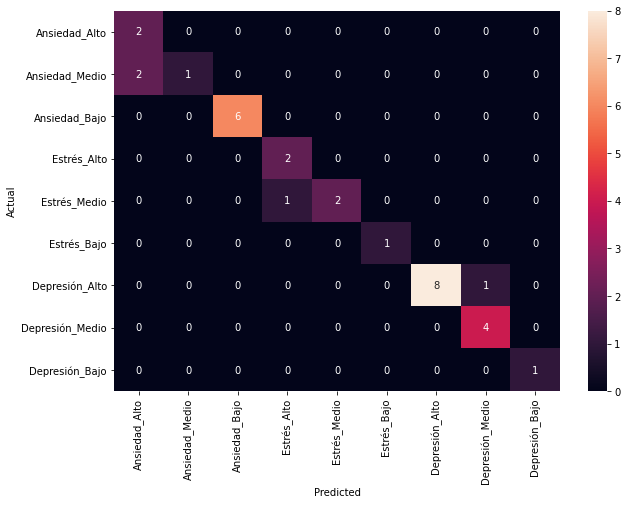

In [ ]:
# Gráfica de matriz de confución con seaborn
from sklearn.metrics import confusion_matrix

y_test_rf=yTest2
y_pred_rf=predictRFC2
category_dict=trastorno_y_nivel


conf_mat = confusion_matrix(y_test_rf, y_pred_rf)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_dict, yticklabels=category_dict)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### Guardo modelos

In [ ]:
import joblib # Para exportar el modelo


In [ ]:
filename = 'DT1.pkl'
joblib.dump(modelTree, filename) # Modelo Árboles predice 3 cat
filename = 'DT2.pkl'
joblib.dump(modelTree2, filename) # Modelo Árboles predice 9 cat

filename = 'RF1.pkl'
joblib.dump(modelRFC, filename) # Modelo RF predice 3 cat
filename = 'RF2.pkl'
joblib.dump(modelRFC2, filename) # Modelo RF predice 9 cat


['RF2.pkl']

### Análisis de campo abierto de texto


*   Se traduce el texto a inglés
*   Aplicación de modelos preentrenados
*   Se crea una nueva columna en el dataframe
*   Se exporta a un CSV con el resultado



In [ ]:
# Traducción de textos

start=time.clock()

lista_traducciones=[]
for i in range(0,len(datos_trabajo)):
  traduccion=translator.translate(str(datos_trabajo["CampoAbiertoTexto_185"][i]), lang_tgt='en')
  lista_traducciones.append(traduccion)
  time.sleep(10)
  clear_output(wait=True)
  print("Progreso ", np.round(i/len_datos_revisar*100,2),"%")
# Añado lista al dataframe
datos_trabajo['CampoAbiertoTexto_traducido'] = lista_traducciones 

end = time.clock()
tiempo_proceso=(end-start)/60
print("Tiempo de proceso: ", tiempo_proceso, " minutos")

Progreso  0.0 %
Progreso  0.66 %
Progreso  1.32 %
Progreso  1.99 %
Progreso  2.65 %
Progreso  3.31 %
Progreso  3.97 %
Progreso  4.64 %
Progreso  5.3 %
Progreso  5.96 %
Progreso  6.62 %
Progreso  7.28 %
Progreso  7.95 %
Progreso  8.61 %
Progreso  9.27 %
Progreso  9.93 %
Progreso  10.6 %
Progreso  11.26 %
Progreso  11.92 %
Progreso  12.58 %
Progreso  13.25 %
Progreso  13.91 %
Progreso  14.57 %
Progreso  15.23 %
Progreso  15.89 %
Progreso  16.56 %
Progreso  17.22 %
Progreso  17.88 %
Progreso  18.54 %
Progreso  19.21 %
Progreso  19.87 %
Progreso  20.53 %
Progreso  21.19 %
Progreso  21.85 %
Progreso  22.52 %
Progreso  23.18 %
Progreso  23.84 %
Progreso  24.5 %
Progreso  25.17 %
Progreso  25.83 %
Progreso  26.49 %
Progreso  27.15 %
Progreso  27.81 %
Progreso  28.48 %
Progreso  29.14 %
Progreso  29.8 %
Progreso  30.46 %
Progreso  31.13 %
Progreso  31.79 %
Progreso  32.45 %
Progreso  33.11 %
Progreso  33.77 %
Progreso  34.44 %
Progreso  35.1 %
Progreso  35.76 %
Progreso  36.42 %
Progreso  37.0

In [ ]:
lista_traducciones

['4 subjects can be perceived with anguish and at the same time surprise, it seems that they are seeing something surprising but at the same time heartbreaking ',
 'The girl magaly being at school receives the news that one of her family members is very ill ',
 'You can see a person who is calm, since he has all the work and his pending tasks finished, so he is simply waiting for grades, although on the other hand, he is accompanied by other people who clearly see that you are worried and stressed. ',
 'I think the image shows several stressed, fatigued students, the two girls show a serious face without pressure, the student in the plaid shirt, looks very distressed, like worried, the boy with the soccer jacket looks very tired, he really shows the fatigue on his face and hurt. ',
 'In a classroom there are several kids, one of them is extremely calm, while another of her classmates is somewhat confused but in the background a classmate with bruises is seen, very worried and even stre

In [ ]:
datos_trabajo.head()

,agerange,genero_39,edo_civil_46,hijos_55,Hermanos_223,ViveCon_224,CursosAdicionalesSiNo_233,semestre_56,CalidadInternet_212,SeConectaDesde_237,Dispositivo_238,ComoResponder_1,Ansiedad_P1,Ansiedad_P2,Ansiedad_P3,Ansiedad_P4,Ansiedad_P5,Ansiedad_P6,Ansiedad_P7,Estres_P1,Estres_P2,Estres_P3,Estres_P4,Estres_P5,Estres_P6,Estres_P7,Depresion_P1,Depresion_P2,Depresion_P3,Depresion_P4,Depresion_P5,Depresion_P6,Depresion_P7,CampoAbiertoTexto_185,transtorno_190,nivelTranstorno_192,transtorno_y_nivel,CampoAbiertoTexto_traducido
0,1,1,1,2,1,1,2,5,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,Se pueden percibir 4 sujetos con angustia y al...,3,2,8,4 subjects can be perceived with anguish and a...
1,2,1,1,1,1,1,2,7,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,1,3,1,1,La niña magaly encontrandoce en la escuela rec...,3,3,9,The girl magaly being at school receives the n...
2,1,1,1,2,1,1,2,5,1,1,3,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,"Se nota una persona que se encuetra tranquila,...",2,3,6,"You can see a person who is calm, since he has..."
3,1,1,1,2,2,1,1,5,1,2,2,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,Creo que en la imagen se muestran varios alumn...,2,3,6,"I think the image shows several stressed, fati..."
4,1,1,1,2,1,1,2,6,2,1,2,1,0,0,0,0,0,0,0,2,2,2,2,2,2,2,0,0,0,0,0,0,0,"En un salón de clases están varios chavos, una...",2,2,5,"In a classroom there are several kids, one of ..."


Se encontró que el API no funciona para realizar traducciones masivas ya que sólo permite 5000 caracteres en total. Se incluyó un delay de 10 segundos entre cada consulta y con esto se solucionó el limitante, aunque el tiempo de la traducción para los 150 registros de entrenamiento se tomó casi 30 min

#### Modelo Sentiment español

In [ ]:
# Aplicación de modelo directamente en español

In [ ]:
# Importo librería
from sentiment_analysis_spanish import sentiment_analysis
# Creación del modelo
sentiment = sentiment_analysis.SentimentAnalysisSpanish()

resultados=[]
start=time.clock()

for i in range(0,len(datos_trabajo)):
  resultado=sentiment.sentiment(str(datos_trabajo["CampoAbiertoTexto_185"][i]))
  resultados.append(resultado)
  time.sleep(1)

# Añado lista al dataframe
datos_trabajo['senti_sp1'] = resultados 

end = time.clock()
tiempo_proceso=(end-start)/60
print("Tiempo de proceso: ", tiempo_proceso, " minutos")

Progreso  0.0 %
Progreso  0.66 %
Progreso  1.32 %
Progreso  1.99 %
Progreso  2.65 %
Progreso  3.31 %
Progreso  3.97 %
Progreso  4.64 %
Progreso  5.3 %
Progreso  5.96 %
Progreso  6.62 %
Progreso  7.28 %
Progreso  7.95 %
Progreso  8.61 %
Progreso  9.27 %
Progreso  9.93 %
Progreso  10.6 %
Progreso  11.26 %
Progreso  11.92 %
Progreso  12.58 %
Progreso  13.25 %
Progreso  13.91 %
Progreso  14.57 %
Progreso  15.23 %
Progreso  15.89 %
Progreso  16.56 %
Progreso  17.22 %
Progreso  17.88 %
Progreso  18.54 %
Progreso  19.21 %
Progreso  19.87 %
Progreso  20.53 %
Progreso  21.19 %
Progreso  21.85 %
Progreso  22.52 %
Progreso  23.18 %
Progreso  23.84 %
Progreso  24.5 %
Progreso  25.17 %
Progreso  25.83 %
Progreso  26.49 %
Progreso  27.15 %
Progreso  27.81 %
Progreso  28.48 %
Progreso  29.14 %
Progreso  29.8 %
Progreso  30.46 %
Progreso  31.13 %
Progreso  31.79 %
Progreso  32.45 %
Progreso  33.11 %
Progreso  33.77 %
Progreso  34.44 %
Progreso  35.1 %
Progreso  35.76 %
Progreso  36.42 %
Progreso  37.0

#### Modelo senty-py español

In [ ]:
# Creación del modelo. El modelo ya se encuentra entrenado con expresiones en español latinoamericanas

from classifier import *

clf = SentimentClassifier()

resultados=[]
start=time.clock()

for i in range(0,len(datos_trabajo)):
  resultado=clf.predict(str(datos_trabajo["CampoAbiertoTexto_185"][i]))
  resultados.append(resultado)
  time.sleep(1)

# Añado lista al dataframe
datos_trabajo['senti_sp2'] = resultados 

end = time.clock()
tiempo_proceso=(end-start)/60
print("Tiempo de proceso: ", tiempo_proceso, " minutos")

Progreso  0.0 %
Progreso  0.66 %
Progreso  1.32 %
Progreso  1.99 %
Progreso  2.65 %
Progreso  3.31 %
Progreso  3.97 %
Progreso  4.64 %
Progreso  5.3 %
Progreso  5.96 %
Progreso  6.62 %
Progreso  7.28 %
Progreso  7.95 %
Progreso  8.61 %
Progreso  9.27 %
Progreso  9.93 %
Progreso  10.6 %
Progreso  11.26 %
Progreso  11.92 %
Progreso  12.58 %
Progreso  13.25 %
Progreso  13.91 %
Progreso  14.57 %
Progreso  15.23 %
Progreso  15.89 %
Progreso  16.56 %
Progreso  17.22 %
Progreso  17.88 %
Progreso  18.54 %
Progreso  19.21 %
Progreso  19.87 %
Progreso  20.53 %
Progreso  21.19 %
Progreso  21.85 %
Progreso  22.52 %
Progreso  23.18 %
Progreso  23.84 %
Progreso  24.5 %
Progreso  25.17 %
Progreso  25.83 %
Progreso  26.49 %
Progreso  27.15 %
Progreso  27.81 %
Progreso  28.48 %
Progreso  29.14 %
Progreso  29.8 %
Progreso  30.46 %
Progreso  31.13 %
Progreso  31.79 %
Progreso  32.45 %
Progreso  33.11 %
Progreso  33.77 %
Progreso  34.44 %
Progreso  35.1 %
Progreso  35.76 %
Progreso  36.42 %
Progreso  37.0

#### Modelo TextBlob inglés

In [ ]:
# Importo librería
from textblob import TextBlob

blob1 = TextBlob(frase1_en)
for sentence in blob1.sentences:
    print(sentence, "//Polaridad: ", sentence.sentiment.polarity)

resultados=[]
start=time.clock()

for i in range(0,len(datos_trabajo)):
  blob1 = TextBlob(str(datos_trabajo["CampoAbiertoTexto_traducido"][i]))
  resultado=blob1.sentiment
  resultados.append(resultado)
  time.sleep(1)

# Añado lista al dataframe
datos_trabajo['senti_en'] = resultados 

end = time.clock()
tiempo_proceso=(end-start)/60
print("Tiempo de proceso: ", tiempo_proceso, " minutos")

The students seem stressed during class, the brunette girl seems to be upset by some situation (probably an assessment work), while the girl next door seems to be stressed by receiving more work. //Polaridad:  0.25
The boy in the back in the blue jacket looks worried and shows tension in his hands //Polaridad:  0.0
Progreso  0.0 %
Progreso  0.66 %
Progreso  1.32 %
Progreso  1.99 %
Progreso  2.65 %
Progreso  3.31 %
Progreso  3.97 %
Progreso  4.64 %
Progreso  5.3 %
Progreso  5.96 %
Progreso  6.62 %
Progreso  7.28 %
Progreso  7.95 %
Progreso  8.61 %
Progreso  9.27 %
Progreso  9.93 %
Progreso  10.6 %
Progreso  11.26 %
Progreso  11.92 %
Progreso  12.58 %
Progreso  13.25 %
Progreso  13.91 %
Progreso  14.57 %
Progreso  15.23 %
Progreso  15.89 %
Progreso  16.56 %
Progreso  17.22 %
Progreso  17.88 %
Progreso  18.54 %
Progreso  19.21 %
Progreso  19.87 %
Progreso  20.53 %
Progreso  21.19 %
Progreso  21.85 %
Progreso  22.52 %
Progreso  23.18 %
Progreso  23.84 %
Progreso  24.5 %
Progreso  25.17 %
P

#### Modelo text-to-emotion inglés

In [ ]:
import text2emotion as te


#test1=te.get_emotion(text)


resultados=[]
start=time.clock()

for i in range(0,len(datos_trabajo)):
  resultado=te.get_emotion(str(datos_trabajo["CampoAbiertoTexto_traducido"][i]))
  resultados.append(resultado)
  time.sleep(1)

# Añado lista al dataframe
datos_trabajo['emotion_en'] = resultados 

end = time.clock()
tiempo_proceso=(end-start)/60
print("Tiempo de proceso: ", tiempo_proceso, " minutos")

In [ ]:
datos_trabajo.head()

In [ ]:
# Guardo dataframe como CSV

from google.colab import files
datos_trabajo.to_csv('datos.csv') 
files.download('datos.csv')